In [73]:
! unzip /content/OneDrive_2025-02-14.zip

unzip:  cannot find or open /content/OneDrive_2025-02-14.zip, /content/OneDrive_2025-02-14.zip.zip or /content/OneDrive_2025-02-14.zip.ZIP.


In [74]:
import sys
import os
import pandas as pd
###There is something you need to change before using
# change the path where jupyter access
Path=r'OneDrive_2025-02-14.zip'
#where change the path of data in "additional folder"
path_add_folder=r'/Users/radhakadam/Documents/DSMP/Data Earth Sciences/925 Data additional data'
#where change the path of data in "Rise data"
path_rise_folder=r'/Users/radhakadam/Documents/DSMP/Data Earth Sciences/Ceara Rise data'
sys.path.append(Path)
#merge name of excel into list files
files_add = [file for file in os.listdir(path_add_folder)
             if file.endswith('.csv') or file.endswith('.xlsx')]
files_rise = [file for file in os.listdir(path_rise_folder)
             if file.endswith('.csv') or file.endswith('.xlsx')]
def read_all_excel_from_folder(path,files):
    #initialize a library to storage
    list=[]
    for file in files:
        #join the path of excel to the path of folder
        file_path = os.path.join(path,file)
        #get data with panda
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        else:
            df = pd.read_excel(file_path)
        #get name of excel without exthension
        file_name_without_extension = os.path.splitext(file)[0]
        #storage data in library with name of excel to index
        list.append(df)
    return list

##storage data from additon_folder
excels_add= read_all_excel_from_folder(path_add_folder,files_add)
#example of indexing
print(excels_add[0])
#because the name of excel is complex so we read the name of file with number
#but it is ok to index with(excel_add[files_add.index('name')])
print(excels_add[files_add.index(files_add[0])])

##storage fata from rise_folder
excels_rise= read_all_excel_from_folder(path_rise_folder,files_rise)
print(excels_rise[0])


      Unnamed: 0     X  Object.ID     Area..µm..  Mean..Gray.Intensity.Value.  \
0              1     1          6   37969.758037                    77.807967   
1              2     2        163  175708.230163                    93.676303   
2              3     3        262   51639.441689                    91.990605   
3              4     4        369  120244.701606                   107.885012   
4              5     5        721   48714.300615                   116.174868   
...          ...   ...        ...            ...                          ...   
1119        1120  1120       4202  451270.788300                   150.213464   
1120        1121  1121       4204  164820.997776                   137.859406   
1121        1122  1122       4205  390470.660906                   140.660661   
1122        1123  1123       4207  101324.033002                    97.173778   
1123        1124  1124       4208   46973.484952                   108.278858   

      Shape.Factor  Min..Di

KeyboardInterrupt: 

In [ ]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


    ***I will change name of columns to make sure every excel have same columns , take out blank columns identified by panda and take out last three lines in excel of file"rise" because they are not data about specific samples(you can see why in details by opening excels in 'rise' file)
    add columns in excel which miss "area" and "Perimeter (µm)"
    rearrange columns by letters
    rename colimns
    add columns for indexing age

In [ ]:
import re
#get value of attributes from filenames
def pre_filenames(filenames):
    name_attribute = []
    for filename in filenames:
        # take out extension and "measure ...."
        filename = os.path.splitext(filename)[0]
        filename = filename.replace("Count and Measure of", "").strip()
        # get elements of number and letter
        elements = re.findall(r'\d+\.\d+|\d+|[a-zA-Z]', filename)
        # take out "-"
        parsed_elements=[]
        for element in elements:
            parsed_elements.extend(re.split(r'[-]', element))

        while len(parsed_elements) < 7:
            parsed_elements.append(None)  # Fill with `None` if missing

        name_attribute.append(parsed_elements)
    return name_attribute
# function to reneme columns
def rename_columns(excels):
    new_columns = ['Area (µm²)',
                   'Elongation',
                   'Max (Diameter) (µm)',
                   'Mean (Diameter) (µm)',
                   'Mean (Gray Intensity Value)',
                   'Min (Diameter) (µm)',
                   'Object ID',
                   'Perimeter (µm)',
                   'Shape Factor',
                   'Sphericity']
    excels = [excel.rename(columns=dict(zip(excel.columns,new_columns))) for excel in excels]
    return excels
def add_columns(excels,name_lists):
    excels=[excel.assign(
        SITE = name[0],
        HOLE = name[1],
        CORE = name[2],
        CORE_TYPE=name[3],
        SECTION=name[4],
        TOP_DEPTH=name[5],
        BOTTOM_DEPTH=name[6]
        ) for excel,name in zip(excels,name_lists)]
    return excels

def drop_columns(excels,columns_name):
    return [df.drop(columns=[columns_name], errors='ignore') for df in excels]

#get name of files
pre_filenames_add=pre_filenames(files_add)
#print(pre_filenames_add)
pre_filenames_rise=pre_filenames(files_rise)


for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        excels_rise[i]["Area (µm²)"]=pd.NA
        excels_rise[i]["Perimeter (µm)"]=pd.NA
#test whether they have same number of columns
for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        print(excels_rise[i].columns)
        print(excels_rise[0].columns)
        print(i)

#drop unuseful column in "additional" excel
excels_add_name= drop_columns(excels_add, 'Unnamed: 0')
#drop unuseful column in  "rise" excel
excels_rise_name= drop_columns(excels_rise, 'Statistics')

#rearrange columns by letters
excels_add_name_re= [excel[sorted(excel.columns)] for excel in excels_add_name ]
excels_rise_name_re = [excel[sorted(excel.columns)] for excel in excels_rise_name]





#rename columns
excels_add_columns_rename= rename_columns(excels_add_name_re)

excels_rise_columns_rename= rename_columns(excels_rise_name_re)
excels_rise_columns_rename= [excel.iloc[:-3] for excel in excels_rise_columns_rename]

#add columns which is used to index age
pre_filenames_rise[253][-1]=84.5
pre_filenames_rise[253].append("86.5")
excels_add_columns_index= add_columns(excels_add_columns_rename,pre_filenames_add)
excels_rise_columns_index= add_columns(excels_rise_columns_rename,pre_filenames_rise)
print(excels_rise_columns_index[3])
excels_add_final = excels_add_columns_index
excels_rise_final = excels_rise_columns_index
print(excels_add_final[3].columns)
print(excels_rise_final[3].columns)
print(len(excels_add_final))
print(len(excels_rise_final))
for i in range(len(excels_add_final)):
    excels_add_final[i]['ID']=i
print(excels_add_final[1])
for j in range(len(excels_rise_final)):
    excels_rise_final[j]['ID']=j+len(excels_add_final)
print(excels_rise_final[-1]['ID'])

         Area (µm²)   Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0     608432.346477     1.174354           970.080895            873.953679   
1     578219.973854     1.180626           956.053197            856.260391   
2     486766.161107     1.295327           947.359433            784.904976   
3     444607.624185     1.276365           855.858603            748.901807   
4     398232.165996     1.344717           849.614316            703.962190   
...             ...          ...                  ...                   ...   
2946   22456.440216     1.167679           182.987571            168.603910   
2947   23577.393971     1.106438           182.987571            173.050648   
2948   22013.396590     1.073564           174.540412            167.154122   
2949    2949.000000  2949.000000          2949.000000           2949.000000   
2950   71901.069749     1.200923           318.047529            285.419376   

      Mean (Gray Intensity Value)  Min (Diameter) (

    ***Merge excels in excels in 'rise' file and 'additional' file.
    Alse try to merge samples excels with 'Mastersheet'file to see whether it can add 'age' columns to samples excels.

In [ ]:
Master_sheet_stay=pd.read_excel(r"/Users/radhakadam/Documents/DSMP/Data Earth Sciences/925_Mastersheet.xlsx",engine='openpyxl', header=1)  # Adjust header row
# Strip spaces and newlines from column names
Master_sheet_stay.columns = Master_sheet_stay.columns.str.strip().str.replace("\n", "_", regex=True)

print(Master_sheet_stay.columns)  # Check if columns are correct


Index(['Unnamed: 0', 'EXPEDITION', 'SITE', 'HOLE', 'CORE', 'CORE_TYPE',
       'SECTION', 'CC', 'TOP_DEPTH', 'BOTTOM_DEPTH', 'MBSF_TOP', 'MCD_TOP',
       'Age (Ma)', 'Splits', 'Size.Mean.Area', 'Unnamed: 15',
       'Size.Mean.DiameterMean', 'Size.Mean.DiameterMin',
       'Size.Mean.DiameterMax', 'Size.Mean.Sphericity',
       'Size.Mean.ShapeFactor', 'Size.Median.Area', 'Size.Median.DiameterMean',
       'Size.Median.DiameterMin', 'Size.Median.DiameterMax',
       'Size.Median.Sphericity', 'Size.Median.ShapeFactor', 'Size.sd.Area',
       'Size.sd.DiameterMean', 'Size.sd.DiameterMin', 'Size.sd.DiameterMax',
       'Size.sd.Sphericity', 'Size.sd.ShapeFactor', 'Size.95.Area',
       'Size.95.DiameterMean', 'Size.95.DiameterMin', 'Size.95.DiameterMax',
       'Size.95.Sphericity', 'Size.95.ShapeFactor', 'Size.9.Area',
       'Size.9.DiameterMean', 'Size.9.DiameterMin', 'Size.9.DiameterMax',
       'Size.9.Sphericity', 'Size.9.ShapeFactor', 'Size.skewness.Area',
       'Size.skewness.Di

In [ ]:

Master_sheet =Master_sheet_stay.iloc[:-3]
# make suer type is same
def standardize_types(df):
    # Convert only numeric values, replacing non-numeric with NaN
    df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
    df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
    df["HOLE"] = df["HOLE"].astype(str)  # Keep as string
    df["CORE_TYPE"] = df["CORE_TYPE"].astype(str)
    df["SECTION"] = pd.to_numeric(df["SECTION"], errors='coerce')
    df["TOP_DEPTH"] = pd.to_numeric(df["TOP_DEPTH"], errors='coerce')
    df["BOTTOM_DEPTH"] = pd.to_numeric(df["BOTTOM_DEPTH"], errors='coerce')
    return df
print(Master_sheet.dtypes)
print(excels_rise_final[3].dtypes)
print(excels_add_final[2].dtypes)
Master_sheet = standardize_types(Master_sheet)
excels_rise_final_st = [standardize_types(df) for df in excels_rise_final]
excels_add_final_st = [standardize_types(df) for df in excels_add_final]
# drop lines where age is empty
key_columns = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH", "Age (Ma)"]
key_index=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
mastersheet_filtered = Master_sheet[key_columns].dropna(subset=["Age (Ma)"])
excels_rise_final_std = [excel_rise_final_st.dropna(subset=key_index) for excel_rise_final_st in excels_rise_final_st ]
excels_add_final_std = [excel_add_final_st.dropna(subset=key_index) for excel_add_final_st in excels_add_final_st]
print(excels_rise_final_st[3])

# merge function which wil be used by map
def add_age_info(df):
    df = df.copy()
    for col in ["HOLE", "CORE_TYPE"]:
        df[col] = df[col].astype(str)
    merged_df = df.merge(mastersheet_filtered,
                         on=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"],
                         how="left")
    return merged_df

# storage with age
excels_add_final_updated = [add_age_info(df) for df in excels_add_final_st ]
print(excels_add_final_updated[-1]['ID'])
excels_rise_final_updated = [add_age_info(df) for df in excels_rise_final_st]
print(excels_rise_final_updated[-1]['ID'])
print(excels_rise_final_updated[0]['ID'])
#merge excels of samples
excel_add_whole = pd.concat(excels_add_final_updated,ignore_index=True,axis=0)
print(excel_add_whole['ID'].nunique())
excel_rise_whole =pd.concat(excels_rise_final_updated,ignore_index=True,axis=0)
print(excel_rise_whole['ID'].nunique())
samples=pd.concat([excel_add_whole,excel_rise_whole],ignore_index=True,axis=0)
print(samples['ID'].nunique())
samples.to_csv("samples.csv", index=False)

Unnamed: 0             float64
EXPEDITION             float64
SITE                    object
HOLE                    object
CORE                   float64
                        ...   
Notes                   object
fragments              float64
whole.tests            float64
splits                 float64
fragmentation.index    float64
Length: 71, dtype: object
Area (µm²)                     float64
Elongation                     float64
Max (Diameter) (µm)            float64
Mean (Diameter) (µm)           float64
Mean (Gray Intensity Value)    float64
Min (Diameter) (µm)            float64
Object ID                      float64
Perimeter (µm)                 float64
Shape Factor                   float64
Sphericity                     float64
SITE                            object
HOLE                            object
CORE                            object
CORE_TYPE                       object
SECTION                         object
TOP_DEPTH                       object
BOTTOM_DE

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:7: SettingWithCopyWarning: 

         Area (µm²)   Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0     608432.346477     1.174354           970.080895            873.953679   
1     578219.973854     1.180626           956.053197            856.260391   
2     486766.161107     1.295327           947.359433            784.904976   
3     444607.624185     1.276365           855.858603            748.901807   
4     398232.165996     1.344717           849.614316            703.962190   
...             ...          ...                  ...                   ...   
2946   22456.440216     1.167679           182.987571            168.603910   
2947   23577.393971     1.106438           182.987571            173.050648   
2948   22013.396590     1.073564           174.540412            167.154122   
2949    2949.000000  2949.000000          2949.000000           2949.000000   
2950   71901.069749     1.200923           318.047529            285.419376   

      Mean (Gray Intensity Value)  Min (Diameter) (

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/fol

0       551
1       551
2       551
3       551
4       551
       ... 
4489    551
4490    551
4491    551
4492    551
4493    551
Name: ID, Length: 4494, dtype: int64


/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1791432749.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
/var/fol

0       863
1       863
2       863
3       863
4       863
       ... 
2041    863
2042    863
2043    863
2044    863
2045    863
Name: ID, Length: 2046, dtype: int64
0       552
1       552
2       552
3       552
4       552
       ... 
2950    552
2951    552
2952    552
2953    552
2954    552
Name: ID, Length: 2955, dtype: int64
552
312
864


In [ ]:
samples["key"] = samples[["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]].astype(str).agg("_".join, axis=1)
#set columns which used to group
group_cols = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
question_one_data = samples.groupby(group_cols).agg({
    "Max (Diameter) (µm)": lambda x: x.quantile(0.95),
    "Elongation": lambda x: x.quantile(0.95),
    "Age (Ma)": "first",
    "Min (Diameter) (µm)": lambda x: x.quantile(0.05),
    "Shape Factor": "mean",
    "Sphericity":"mean"

}).reset_index()
question_one_data = question_one_data.copy().dropna(subset=["Age (Ma)",'Max (Diameter) (µm)','Elongation', "Sphericity", "Shape Factor","Min (Diameter) (µm)"])
print(question_one_data)
question_one_data.to_csv("question_one_data.csv", index=False)

      SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  \
1    925.0    B   3.0         H      1.0      115.0         116.0   
2    925.0    B   3.0         H      2.0       54.0          56.0   
3    925.0    B   3.0         H      2.0       94.0          96.0   
4    925.0    B   3.0         H      2.0      121.0         123.0   
5    925.0    B   3.0         H      2.0      125.0         127.0   
..     ...  ...   ...       ...      ...        ...           ...   
794  925.0    D  15.0         H      2.0       40.0          42.0   
795  925.0    D  15.0         H      2.0       85.0          87.0   
796  925.0    D  15.0         H      3.0       30.0          32.0   
797  925.0    D  15.0         H      3.0       65.0          67.0   
798  925.0    D  15.0         H      3.0      115.0         117.0   

     Max (Diameter) (µm)  Elongation  Age (Ma)  Min (Diameter) (µm)  \
1             648.942402    1.437448  0.434964           142.448367   
2             573.556717    1

### Trying modified code by Cai on 15th Feb

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

file_path = "https://github.com/SimarleenDung/Data-Science-Mini-Project/blob/data-disposal/question_one_data.xls"
save_path = "/content/C:/Users/Simu/Documents/Github/Data-Science-Mini-Project/plots"
os.makedirs(save_path, exist_ok=True)
df = pd.read_csv('Data Earth Sciences') #, sheet_name='Sheet1')


print("\nShape of data:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())

df.rename(columns={
    "Age (Ma)": "Age_Ma",
    "Max (Diameter) (µm)": "Max_Diameter",
    "Min (Diameter) (µm)": "Min_Diameter",
    "Elongation": "Elongation"
}, inplace=True)

df_sorted = df.sort_values(by="Age_Ma", ascending=True).reset_index(drop=True)

# divid the data into two groups
df_sorted["Age_Group"] = pd.qcut(df_sorted["Age_Ma"], q=5, labels=[
    "0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"
])

# calculate the gap of data
age_label = df_sorted.groupby("Age_Group")["Age_Ma"].agg(["min", "max"])
age_label["Interval"] = age_label["max"] - age_label["min"]
print("\nLabeled Age Group Time Intervals (Million Years, Ma):")
print(age_label)


selected_cols = ["Max_Diameter", "Min_Diameter", "Elongation"]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

for col in selected_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_sorted[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.savefig(f"{save_path}Histogram_{col}.png", dpi=300)
    plt.show()

# outliers
def detect_outliers_iqr(df, cols, factor=1.5):
    outliers_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "count": outlier_mask.sum(),
            "outliers": df.loc[outlier_mask]
        }
    return outliers_info

iqr_outliers = detect_outliers_iqr(df_sorted, selected_cols)
for col, info in iqr_outliers.items():
    print(f"\nColumn: {col}")
    print(f"Lower bound: {info['lower_bound']:.2f}, Upper bound: {info['upper_bound']:.2f}")
    print(f"Number of outliers: {info['count']}")
    print(f"Example outliers:\n{info['outliers'].head()}")

def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

cleaned_data = remove_outliers_iqr(df_sorted, selected_cols)

IsADirectoryError: [Errno 21] Is a directory: 'Data Earth Sciences'

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

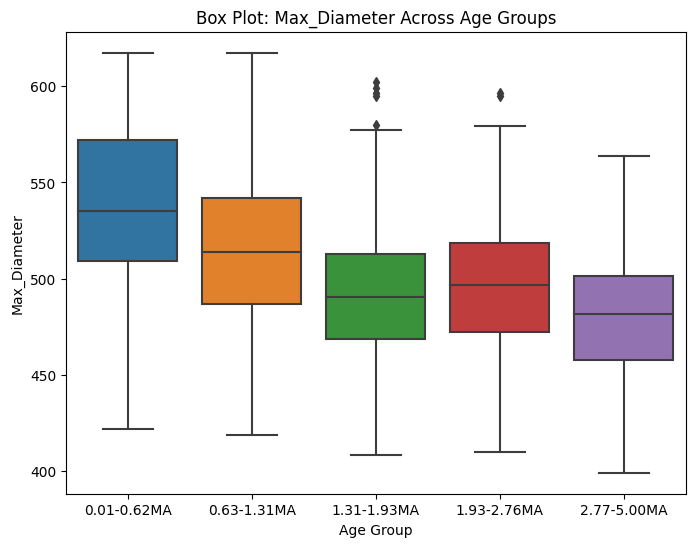

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

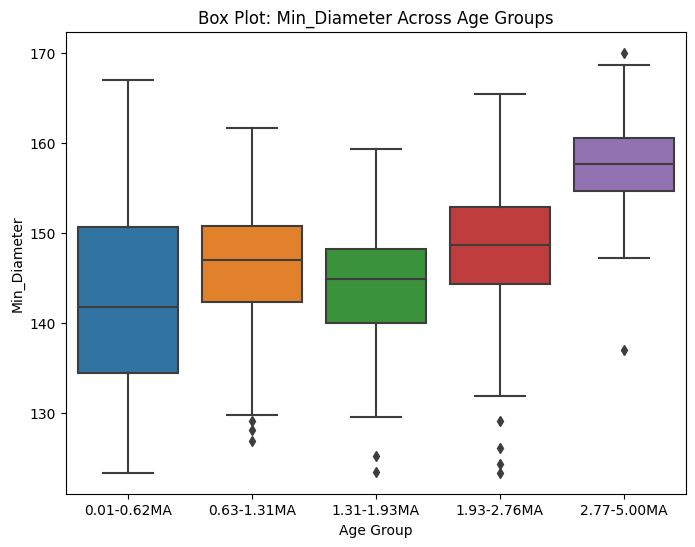

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

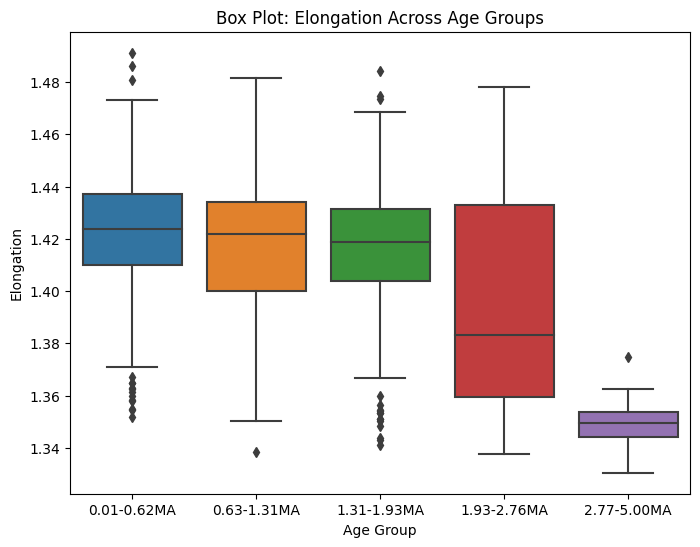

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

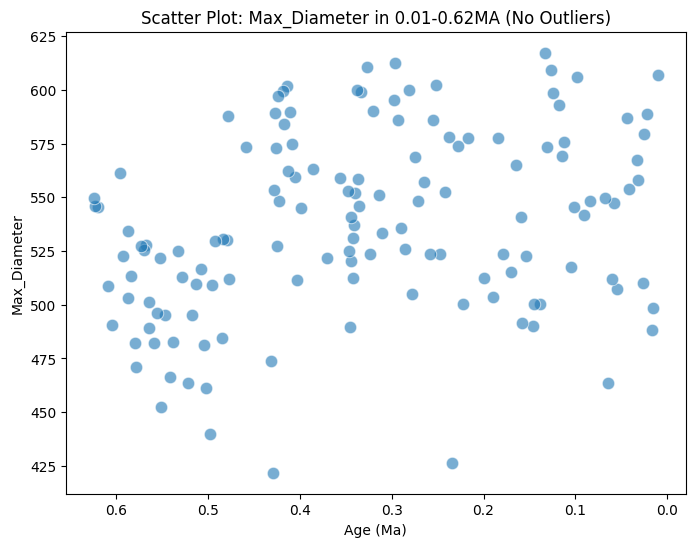

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

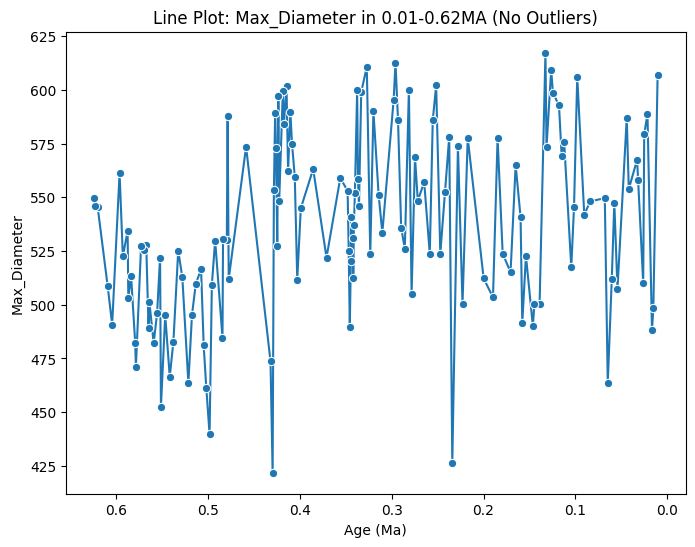

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

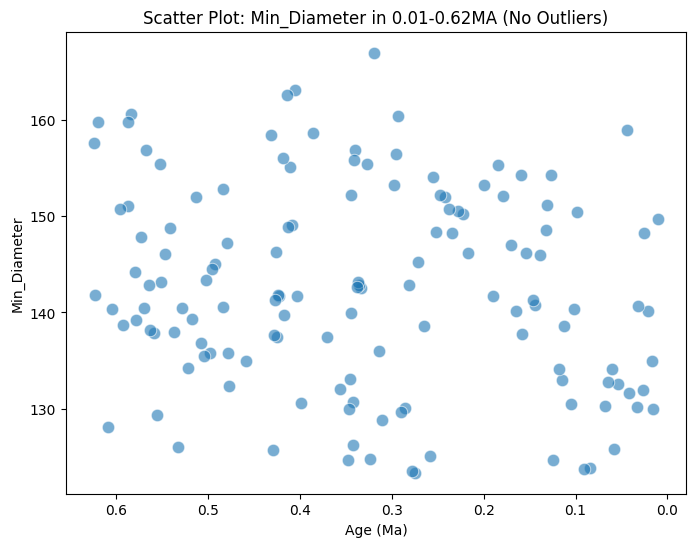

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

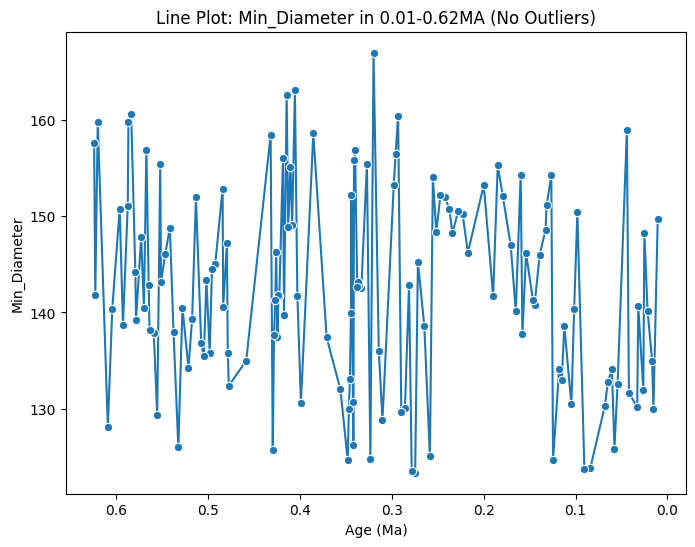

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

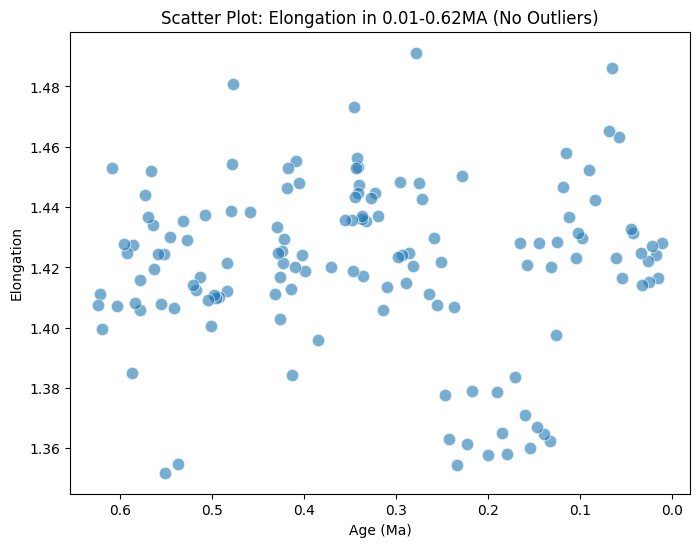

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

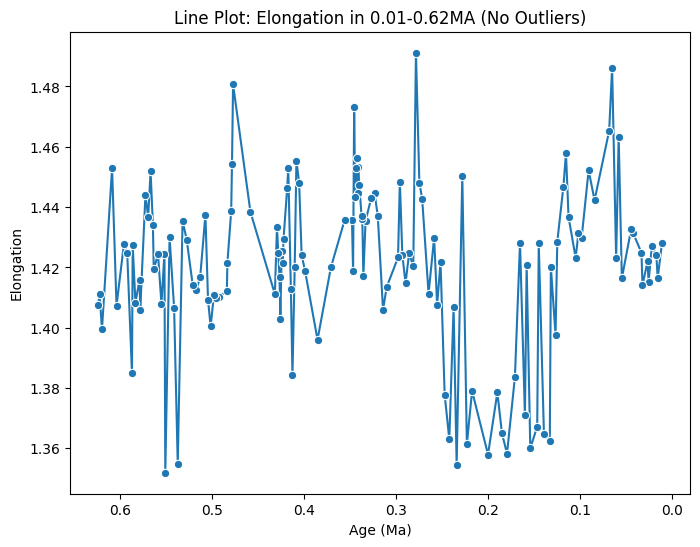

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

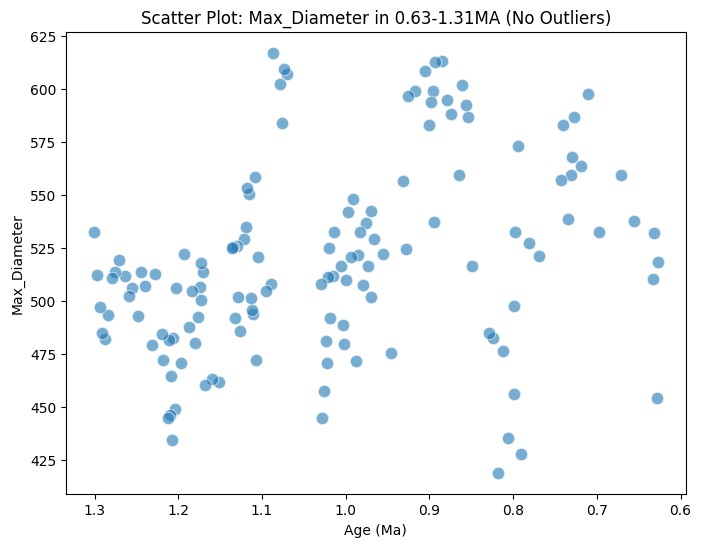

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

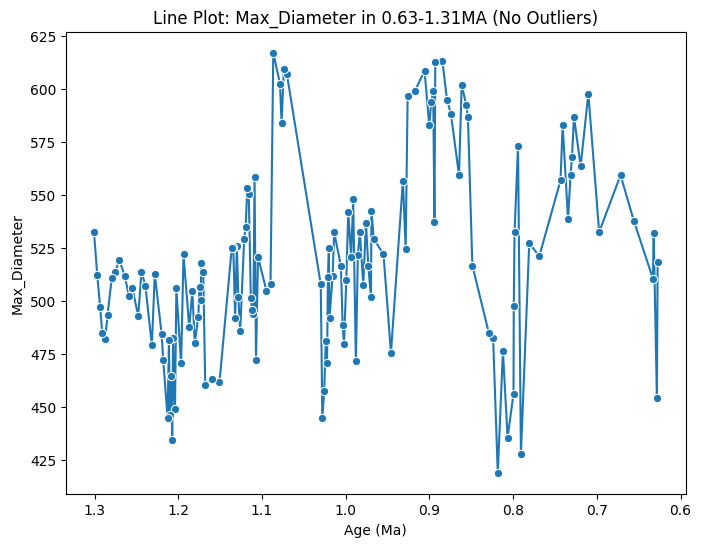

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

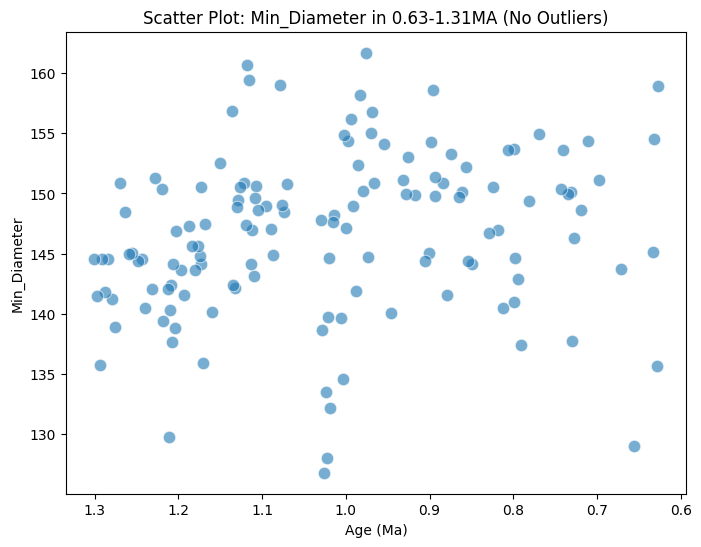

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

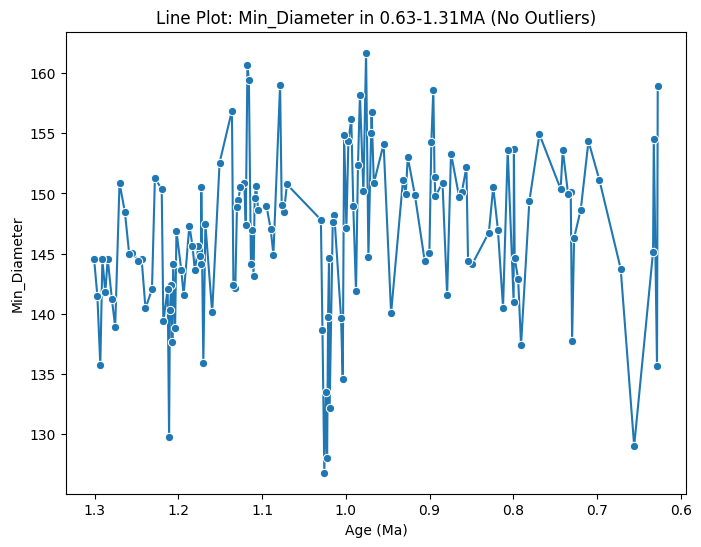

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

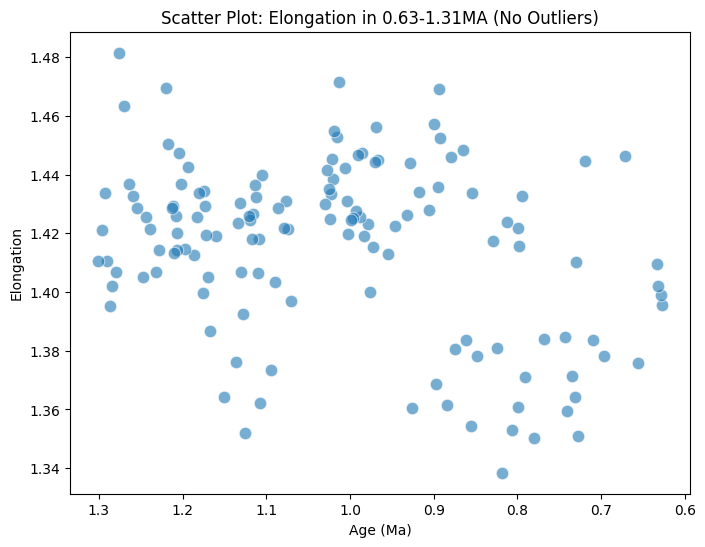

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

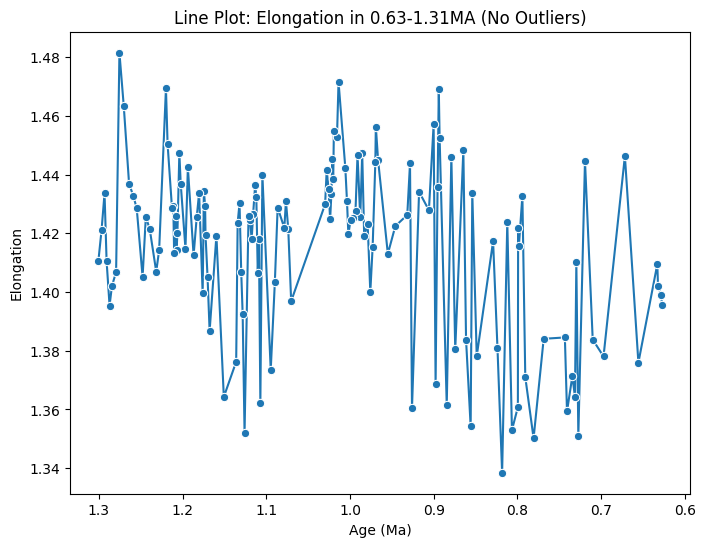

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

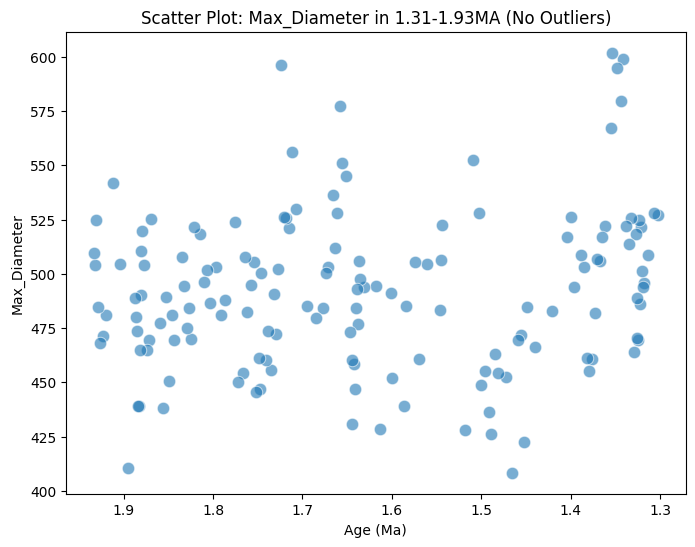

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

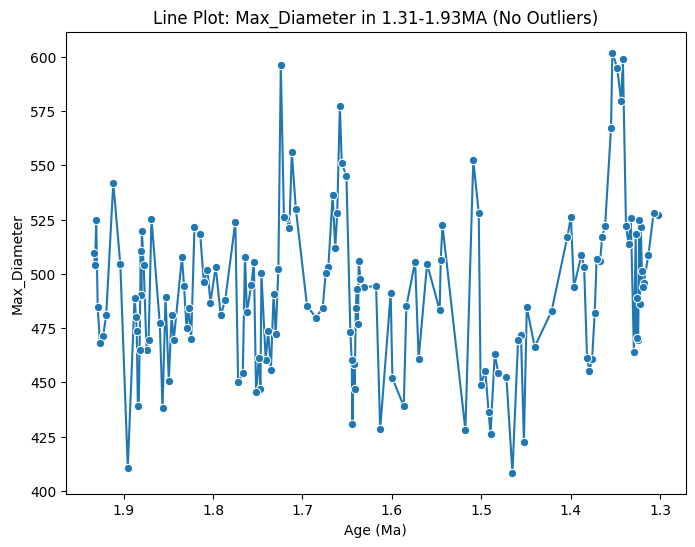

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

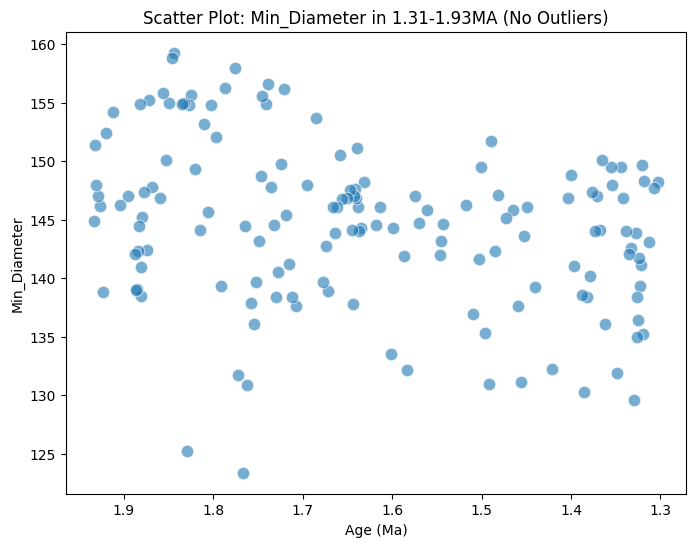

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

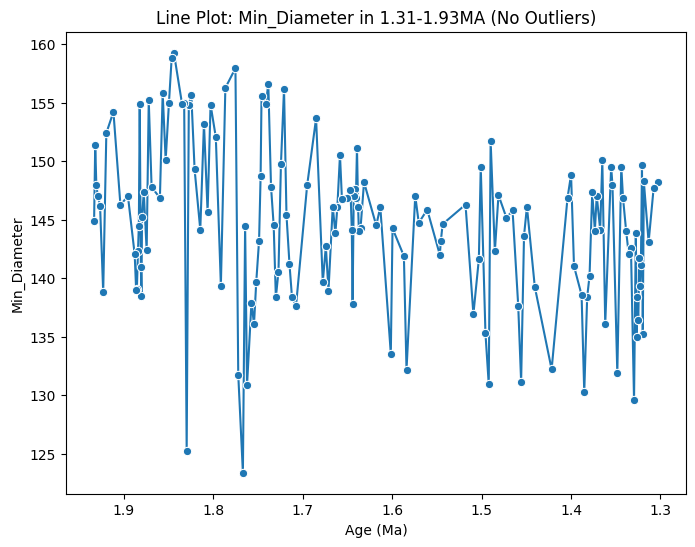

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

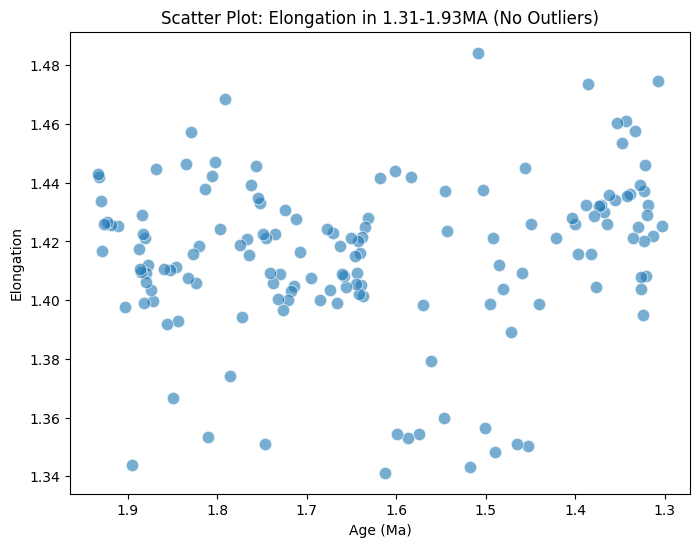

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

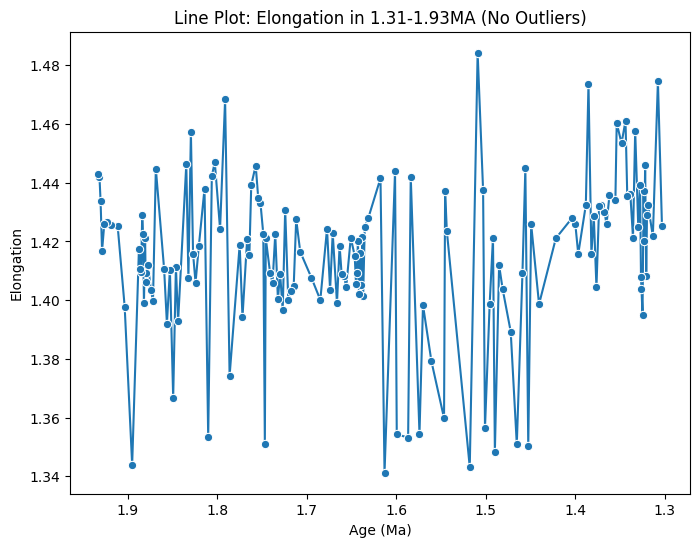

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

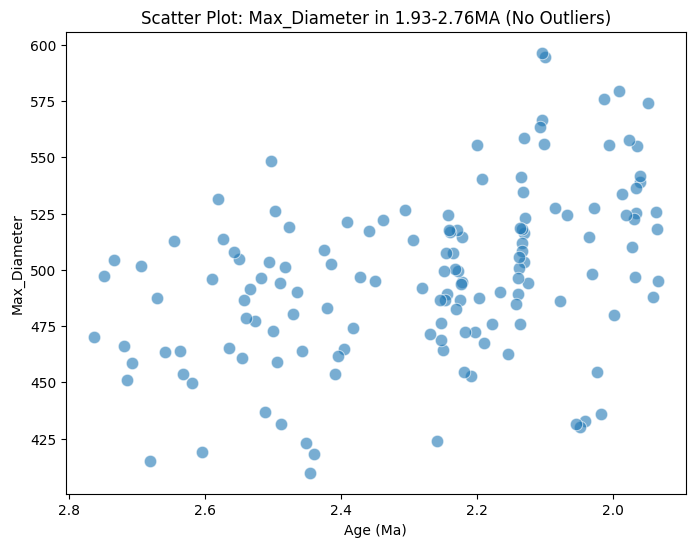

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

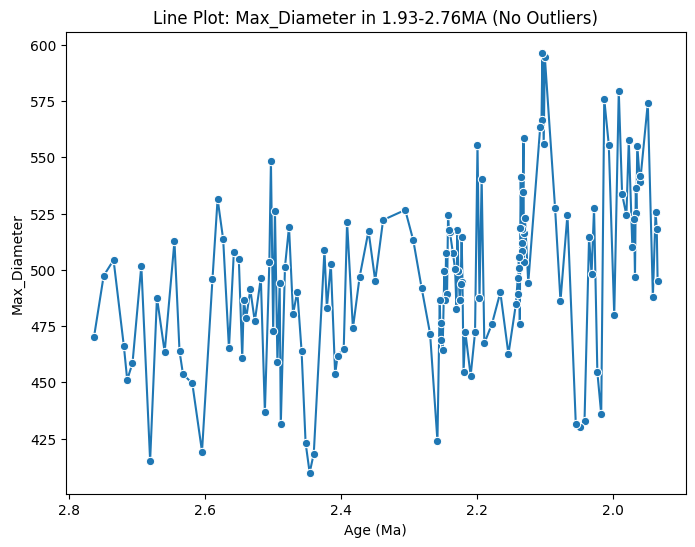

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

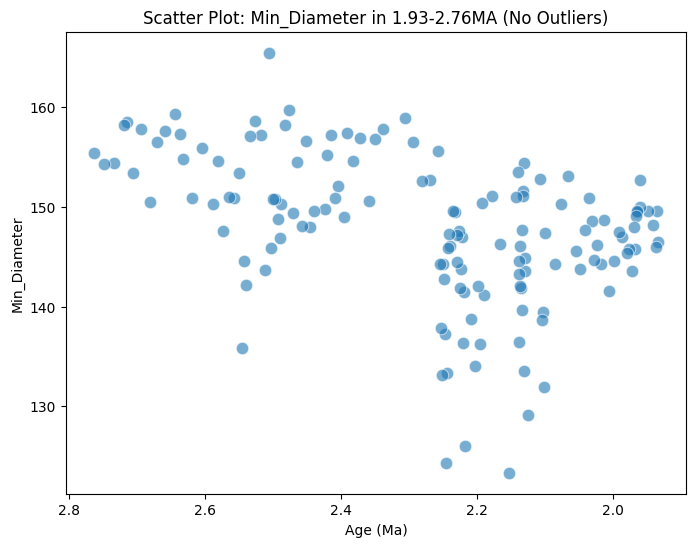

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

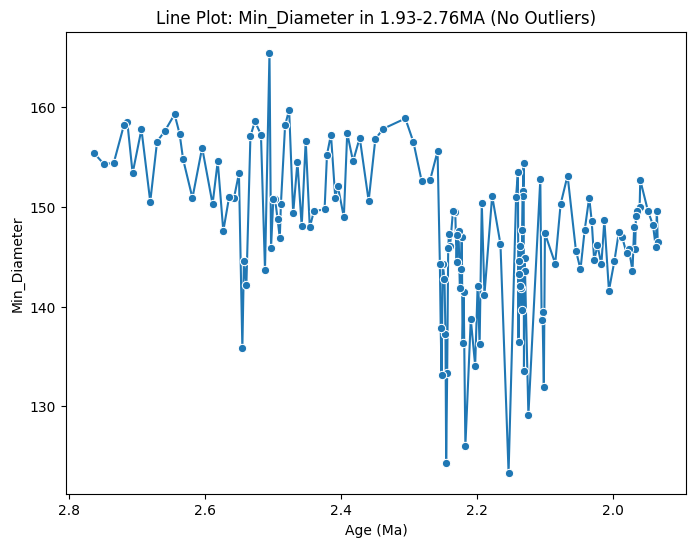

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

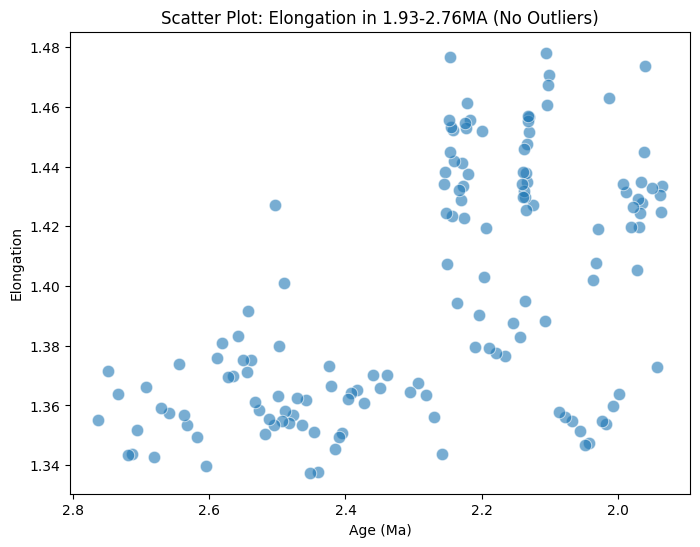

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

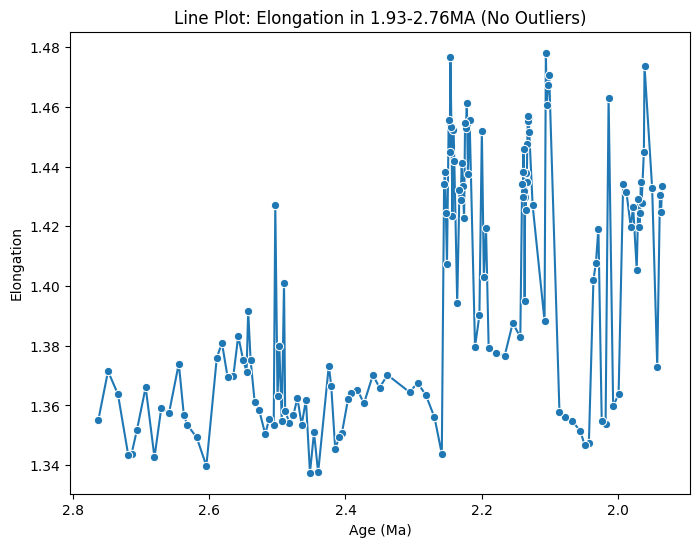

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

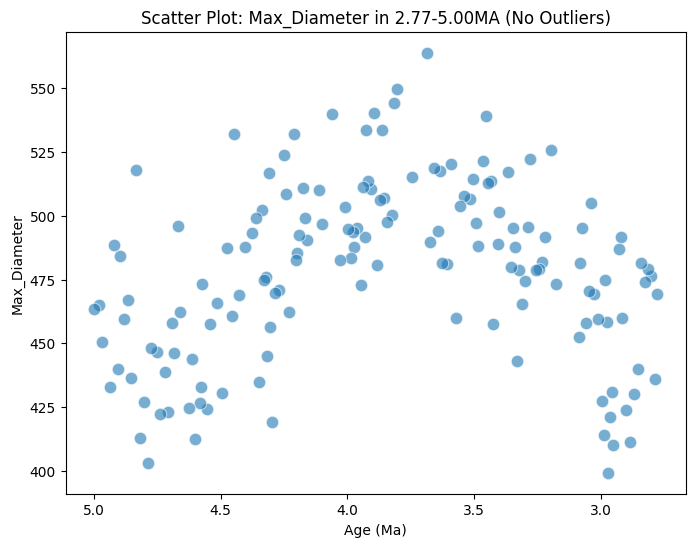

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

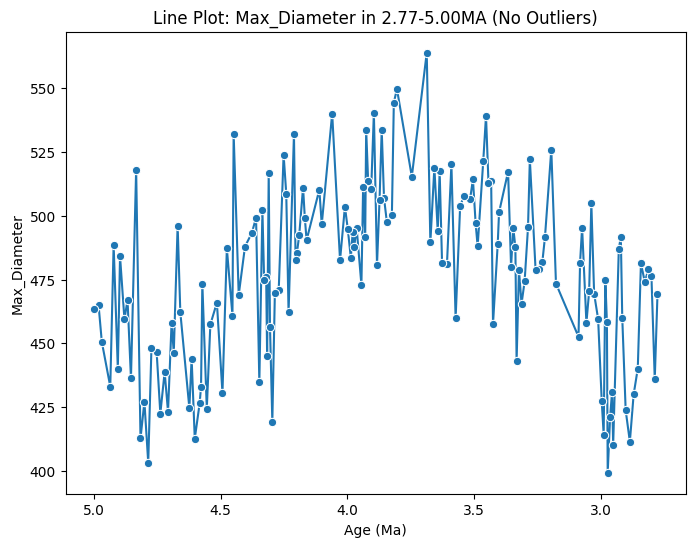

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

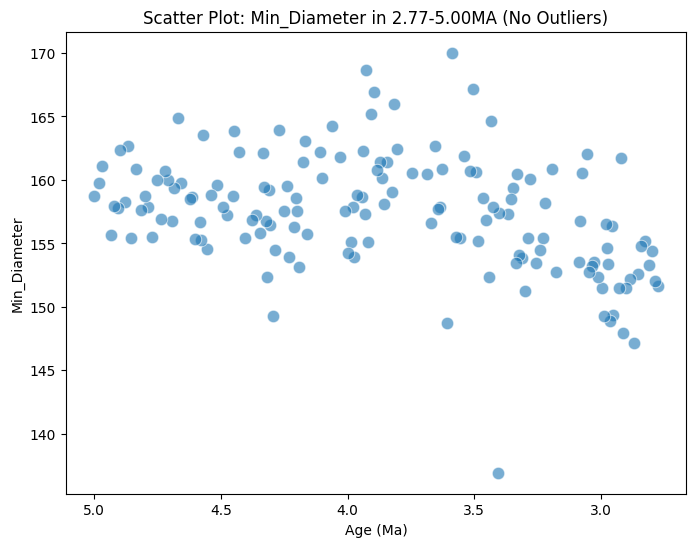

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

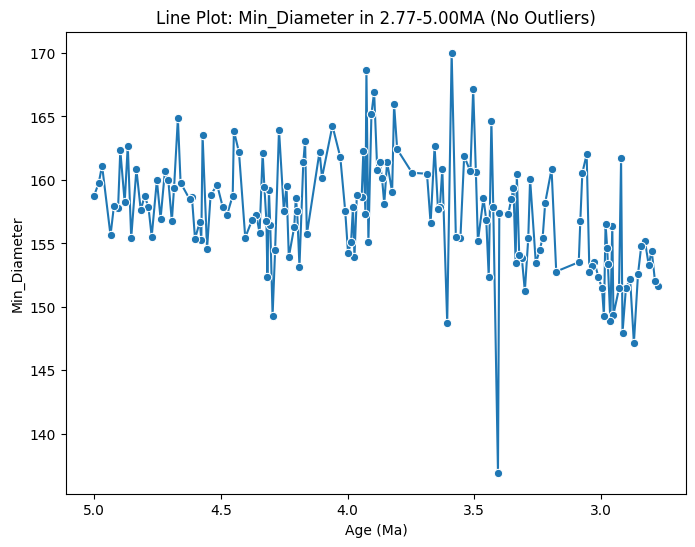

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

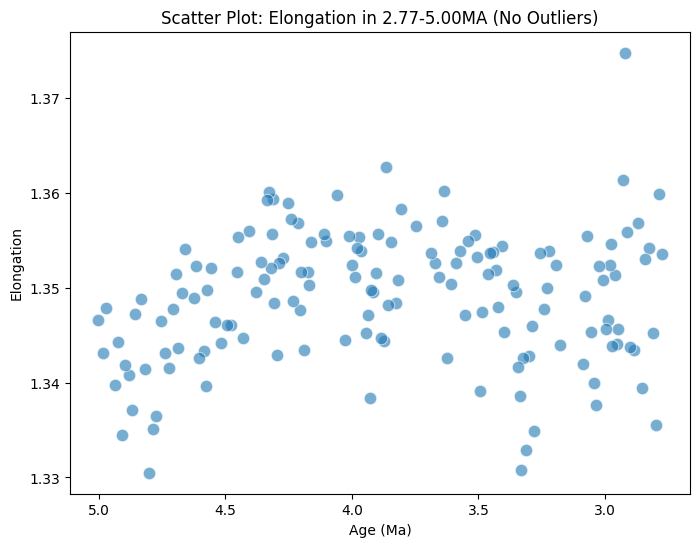

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

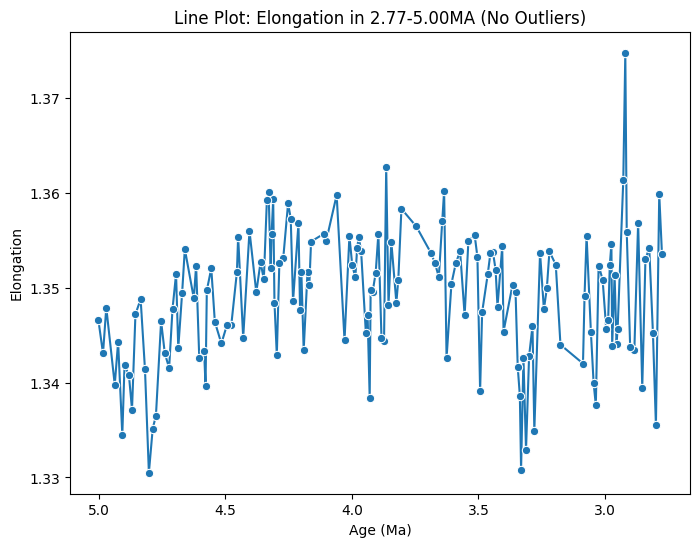

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

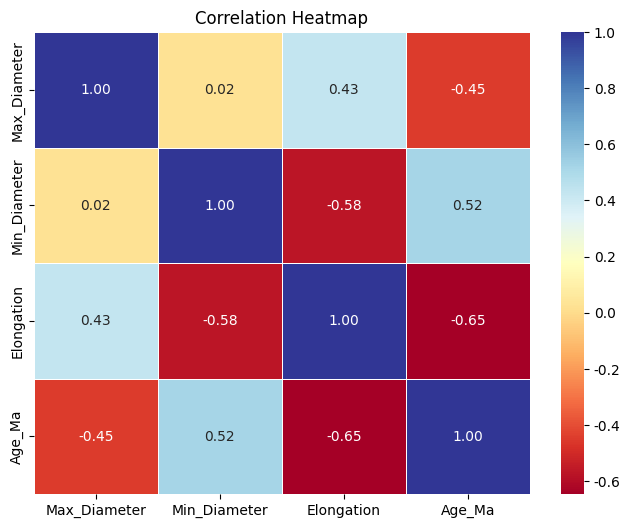

In [ ]:
for feature in selected_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cleaned_data , x="Age_Group", y=feature,
                order=["0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"])
    plt.title(f"Box Plot: {feature} Across Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel(feature)
    plt.savefig(f"{save_path}BoxPlot_{feature}.png", dpi=300)
    plt.show()

for age_group in cleaned_data["Age_Group"].unique():
    df_group = cleaned_data[cleaned_data["Age_Group"] == age_group]

    for feature in selected_cols:
        # 🔹 散点图
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_group, x="Age_Ma", y=feature, alpha=0.6, s=80)
        plt.title(f"Scatter Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()
        plt.savefig(f"{save_path}Scatter_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()

        # 🔹 折线图
        plt.figure(figsize=(8, 6))
        sns.lineplot(data=df_group, x="Age_Ma", y=feature, marker="o")
        plt.title(f"Line Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()
        plt.savefig(f"{save_path}Line_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()


df_sorted[selected_cols + ["Age_Ma"]] = df_sorted[selected_cols + ["Age_Ma"]].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_sorted[selected_cols + ["Age_Ma"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig(f"{save_path}Correlation_Heatmap.png", dpi=300)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, ks_2samp

file_path = '/Users/radhakadam/Documents/DSMP/question_one_data.csv'
data = pd.read_csv(file_path)
print("Data Preview:")
print(data.head())
data.dropna(inplace=True)



Data Preview:
    SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  \
0  925.0    B   3.0         H      1.0      115.0         116.0   
1  925.0    B   3.0         H      2.0       54.0          56.0   
2  925.0    B   3.0         H      2.0       94.0          96.0   
3  925.0    B   3.0         H      2.0      121.0         123.0   
4  925.0    B   3.0         H      2.0      125.0         127.0   

   Max (Diameter) (µm)  Elongation  Age (Ma)  Min (Diameter) (µm)  \
0           648.942402    1.437448  0.434964           142.448367   
1           573.556717    1.438404  0.458446           134.983016   
2           645.188676    1.412250  0.469669           162.758397   
3           511.934143    1.480690  0.477353           132.385124   
4           587.701233    1.454152  0.478529           135.820561   

   Shape Factor  Sphericity  
0      0.813618    0.664793  
1      0.826045    0.696708  
2      0.831385    0.723345  
3      0.809738    0.690826  
4      0.812144   

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/3355250084.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age (Ma)')


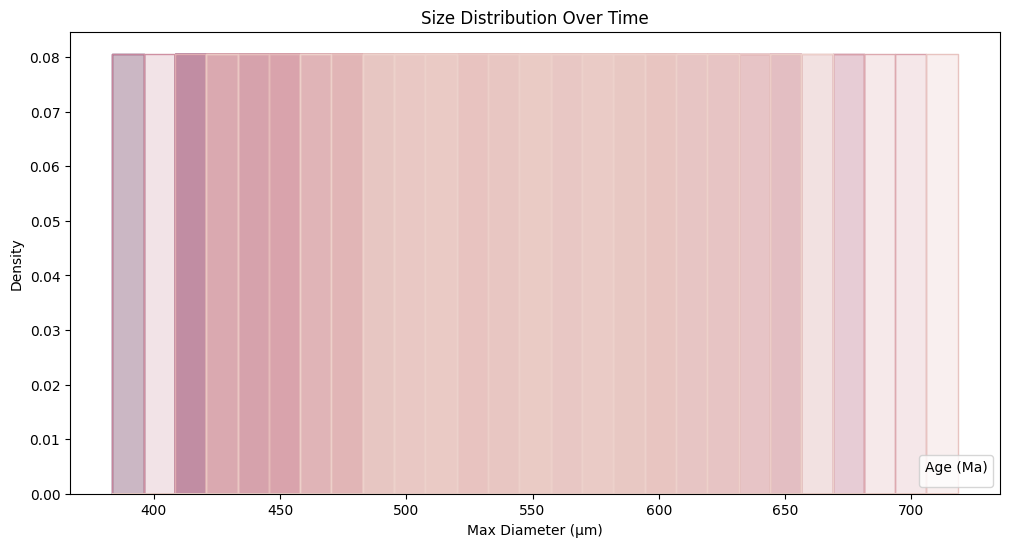

In [ ]:
# Visualize size distributions over time
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Max (Diameter) (µm)', hue='Age (Ma)', element='step', stat='density', common_norm=False)
plt.xlabel('Max Diameter (µm)')
plt.ylabel('Density')
plt.title('Size Distribution Over Time')
plt.legend(title='Age (Ma)')
plt.show()

In [ ]:
print(data.columns)


Index(['SITE', 'HOLE', 'CORE', 'CORE_TYPE', 'SECTION', 'TOP_DEPTH',
       'BOTTOM_DEPTH', 'Max (Diameter) (µm)', 'Elongation', 'Age (Ma)',
       'Min (Diameter) (µm)', 'Shape Factor', 'Sphericity'],
      dtype='object')


In [ ]:
#Compute summary statistics
summary_stats = data.groupby('Age (Ma)')['Max (Diameter) (µm)'].agg(['mean', 'std', skew, kurtosis]).reset_index()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
     Age (Ma)        mean  std  skew  kurtosis
0    0.010531  606.857631  NaN   NaN       NaN
1    0.015184  498.252047  NaN   NaN       NaN
2    0.016653  488.045770  NaN   NaN       NaN
3    0.021551  588.663953  NaN   NaN       NaN
4    0.025105  579.568730  NaN   NaN       NaN
..        ...         ...  ...   ...       ...
668  4.922597  488.607056  NaN   NaN       NaN
669  4.935862  433.039801  NaN   NaN       NaN
670  4.969323  450.631640  NaN   NaN       NaN
671  4.982246  465.185865  NaN   NaN       NaN
672  5.000708  463.317755  NaN   NaN       NaN

[673 rows x 5 columns]


In [ ]:

# Test for distribution changes over time
unique_times = data['Age (Ma)'].unique()
for i in range(len(unique_times) - 1):
    time1 = unique_times[i]
    time2 = unique_times[i + 1]

    dist1 = data[data['Age (Ma)'] == time1]['Max (Diameter) (µm)']
    dist2 = data[data['Age (Ma)'] == time2]['Max (Diameter) (µm)']

    ks_stat, p_value = ks_2samp(dist1, dist2)

    print(f"Comparing {time1} Ma vs {time2} Ma:")
    print(f"  KS Statistic: {ks_stat:.3f}, p-value: {p_value:.3f}")

    if p_value < 0.05:
        print("  Significant change in distribution shape (p < 0.05)")
    else:
        print("  No significant change in distribution shape (p >= 0.05)")


Comparing 0.434964028776978 Ma vs 0.458446043165468 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.458446043165468 Ma vs 0.469669064748201 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.469669064748201 Ma vs 0.477352941176471 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.477352941176471 Ma vs 0.478529411764706 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.478529411764706 Ma vs 0.479411764705882 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.479411764705882 Ma vs 0.483529411764706 Ma:
  KS Statistic: 1.000, p-value: 1.000
  No significant change in distribution shape (p >= 0.05)
Comparing 0.483529411764706 Ma vs 0.484117647058824 Ma:
  KS Statistic: 1.000, p-value: 

In [ ]:
print(data['Age (Ma)'].value_counts())

Age (Ma)
0.434964    1
1.502947    1
1.465277    1
1.472085    1
1.481021    1
           ..
1.325931    1
1.326448    1
1.327483    1
1.329476    1
5.000708    1
Name: count, Length: 673, dtype: int64



hmmmmmmmmmmmmm looks like each age value appears only once, which is why we're getting NaN for standard deviation, skewness, and kurtosis — these metrics need multiple values per group.

Let’s fix this by binning the ages! For example, we can group ages into bins of 0.1 Ma or any interval you prefer. This will pool nearby samples, giving us enough data points to calculate meaningful statistics.

In [ ]:
# Bin ages to group nearby points
bin_width = 0.1  # You can adjust this bin size!
data['Age Bin (Ma)'] = pd.cut(data['Age (Ma)'], bins=pd.interval_range(start=data['Age (Ma)'].min(), end=data['Age (Ma)'].max(), freq=bin_width))

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/3115238907.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Bin (Ma)', bbox_to_anchor=(1.05, 1), loc='upper left')


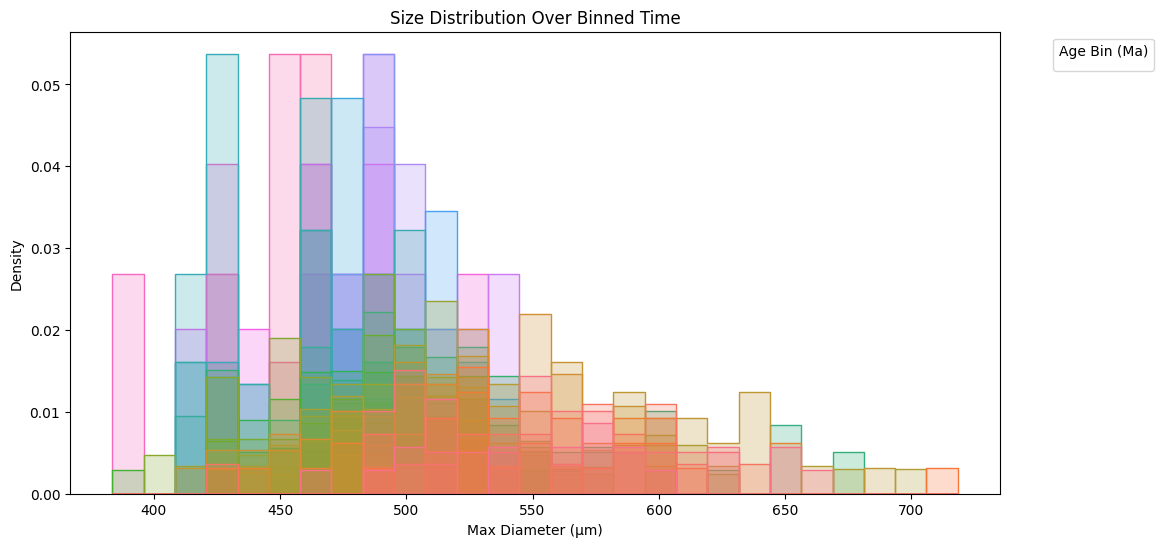

In [ ]:

# Visualize size distributions over time
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Max (Diameter) (µm)', hue='Age Bin (Ma)', element='step', stat='density', common_norm=False)
plt.xlabel('Max Diameter (µm)')
plt.ylabel('Density')
plt.title('Size Distribution Over Binned Time')
plt.legend(title='Age Bin (Ma)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Compute summary statistics for each bin
summary_stats = data.groupby('Age Bin (Ma)')['Max (Diameter) (µm)'].agg(['count', 'mean', 'std', skew, kurtosis]).reset_index()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                Age Bin (Ma)  count        mean        std  \
0     (0.010530612244898, 0.110530612244898]     28  560.081820  51.009351   
1     (0.110530612244898, 0.210530612244898]     16  548.031745  45.139262   
2   (0.210530612244898, 0.31053061224489803]     22  553.047640  50.413194   
3   (0.31053061224489803, 0.410530612244898]     26  555.108174  45.465775   
4     (0.410530612244898, 0.510530612244898]     26  540.496489  58.879163   
5    (0.510530612244898, 0.6105306122448981]     24  505.266621  23.563353   
6   (0.6105306122448981, 0.7105306122448981]     11  525.504858  33.903308   
7   (0.7105306122448981, 0.8105306122448981]     15  523.410378  52.585023   
8   (0.8105306122448981, 0.9105306122448981]     26  579.425817  61.883127   
9    (0.9105306122448981, 1.010530612244898]     24  532.565923  44.446588   
10   (1.010530612244898, 1.1105306122448981]     27  530.372814  69.271095   
11  (1.1105306122448981, 1.2105306122448982]

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1403011386.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby('Age Bin (Ma)')['Max (Diameter) (µm)'].agg(['count', 'mean', 'std', skew, kurtosis]).reset_index()
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/radhakadam/Library/Python/3.9/

for empty bins where no data points fall inside. Those NaNs are causing the mean, skew, and kurtosis calculations to break. Let’s clean it up!

i'll fix it hehehe

Handle Empty Bins: Drop rows with NaNs in the summary stats.

Silence Warnings: Add error handling to avoid runtime warnings.



still getting warnings —

In [ ]:
# Compute summary statistics for each bin
summary_stats = data.groupby('Age Bin (Ma)', observed=False)['Max (Diameter) (µm)'].agg(['count', 'mean', 'std', skew, kurtosis]).reset_index()

/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1303: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


Mean of empty slice" warning is still hanging around. I doubt some bins might be empty, even after dropping NaNs.

In [ ]:
# Print bin counts to debug empty bins
bin_counts = data['Age Bin (Ma)'].value_counts()
print("Bin counts:")
print(bin_counts)

Bin counts:
Age Bin (Ma)
(1.310530612244898, 1.4105306122448982]     34
(1.1105306122448981, 1.2105306122448982]    31
(2.210530612244898, 2.3105306122448983]     29
(2.110530612244898, 2.210530612244898]      29
(0.010530612244898, 0.110530612244898]      28
(1.9105306122448982, 2.010530612244898]     28
(1.7105306122448982, 1.810530612244898]     28
(1.010530612244898, 1.1105306122448981]     27
(1.810530612244898, 1.9105306122448982]     27
(0.31053061224489803, 0.410530612244898]    26
(0.410530612244898, 0.510530612244898]      26
(0.8105306122448981, 0.9105306122448981]    26
(1.6105306122448981, 1.7105306122448982]    25
(0.9105306122448981, 1.010530612244898]     24
(1.2105306122448982, 1.310530612244898]     24
(0.510530612244898, 0.6105306122448981]     24
(0.210530612244898, 0.31053061224489803]    22
(1.4105306122448982, 1.510530612244898]     17
(2.4105306122448984, 2.510530612244898]     17
(0.110530612244898, 0.210530612244898]      16
(2.010530612244898, 2.1105306122448

gotcha got bins with 0 counts, which means the "Mean of empty slice" warnings
  Even though we already drop bins with fewer than 2 points in the summary stats, it’s possible that the KS test still tries to access those empty bins
  
  lets add a chcek which excludes enpty bin from this test


In [ ]:
# Compute summary statistics for each bin
summary_stats = data.groupby('Age Bin (Ma)', observed=False)['Max (Diameter) (µm)'].agg(['count', 'mean', 'std', skew, kurtosis]).reset_index()

# Drop empty bins or bins with fewer than 2 data points
summary_stats = summary_stats[summary_stats['count'] >= 2]

/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1303: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
# Replace potential NaNs in skew/kurtosis
summary_stats['skew'].replace([np.inf, -np.inf], np.nan, inplace=True)
summary_stats['kurtosis'].replace([np.inf, -np.inf], np.nan, inplace=True)
summary_stats.fillna({'skew': 0, 'kurtosis': 0}, inplace=True)

print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
                                Age Bin (Ma)  count        mean        std  \
0     (0.010530612244898, 0.110530612244898]     28  560.081820  51.009351   
1     (0.110530612244898, 0.210530612244898]     16  548.031745  45.139262   
2   (0.210530612244898, 0.31053061224489803]     22  553.047640  50.413194   
3   (0.31053061224489803, 0.410530612244898]     26  555.108174  45.465775   
4     (0.410530612244898, 0.510530612244898]     26  540.496489  58.879163   
5    (0.510530612244898, 0.6105306122448981]     24  505.266621  23.563353   
6   (0.6105306122448981, 0.7105306122448981]     11  525.504858  33.903308   
7   (0.7105306122448981, 0.8105306122448981]     15  523.410378  52.585023   
8   (0.8105306122448981, 0.9105306122448981]     26  579.425817  61.883127   
9    (0.9105306122448981, 1.010530612244898]     24  532.565923  44.446588   
10   (1.010530612244898, 1.1105306122448981]     27  530.372814  69.271095   
11  (1.1105306122448981, 1.2105306122448982]

/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/989636207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  summary_stats['skew'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/989636207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [ ]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tabulate import tabulate

In [ ]:
# Compute summary statistics for each bin
summary_stats = data.groupby('Age Bin (Ma)', observed=False)['Max (Diameter) (µm)'].agg(['count', 'mean', 'std', skew, kurtosis]).reset_index()

# Drop empty bins or bins with fewer than 2 data points
summary_stats = summary_stats[summary_stats['count'] >= 2]

# Replace potential NaNs in skew/kurtosis
summary_stats['skew'].replace([np.inf, -np.inf], np.nan, inplace=True)
summary_stats['kurtosis'].replace([np.inf, -np.inf], np.nan, inplace=True)
summary_stats.fillna({'skew': 0, 'kurtosis': 0}, inplace=True)

print("Summary Statistics:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

Summary Statistics:
+----+------------------------------------------+-------+--------------------+--------------------+-----------------------+----------------------+
|    |               Age Bin (Ma)               | count |        mean        |        std         |         skew          |       kurtosis       |
+----+------------------------------------------+-------+--------------------+--------------------+-----------------------+----------------------+
| 0  |  (0.010530612244898, 0.110530612244898]  |  28   | 560.0818198646955  | 51.00935112353301  |  0.29507653509527526  | -0.6071414321792998  |
| 1  |  (0.110530612244898, 0.210530612244898]  |  16   | 548.0317453866846  |  45.1392618175472  |  0.10816815266485369  | -1.4490656728252884  |
| 2  | (0.210530612244898, 0.31053061224489803] |  22   | 553.0476400505396  | 50.41319390080653  |  -0.558669838841428   | 0.11148453838387917  |
| 3  | (0.31053061224489803, 0.410530612244898] |  26   | 555.1081744939036  | 45.46577461746425  

/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1303: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/1876899591.py:8: FutureWarning: A value is trying to be set on a co

 Step 6: Test for distribution changes between consecutive bins

In [ ]:
unique_bins = summary_stats['Age Bin (Ma)'].dropna().unique()
for i in range(len(unique_bins) - 1):
    bin1 = unique_bins[i]
    bin2 = unique_bins[i + 1]

    dist1 = data[data['Age Bin (Ma)'] == bin1]['Max (Diameter) (µm)']
    dist2 = data[data['Age Bin (Ma)'] == bin2]['Max (Diameter) (µm)']

    # Skip empty distributions
    if dist1.empty or dist2.empty:
        continue

    if len(dist1) > 1 and len(dist2) > 1:
        ks_stat, p_value = ks_2samp(dist1, dist2)

        print(f"Comparing {bin1} vs {bin2}:")
        print(f"  KS Statistic: {ks_stat:.3f}, p-value: {p_value:.3f}")

        if p_value < 0.05:
            print("  Significant change in distribution shape (p < 0.05)")
        else:
            print("  No significant change in distribution shape (p >= 0.05)")


Comparing (0.010530612244898, 0.110530612244898] vs (0.110530612244898, 0.210530612244898]:
  KS Statistic: 0.205, p-value: 0.711
  No significant change in distribution shape (p >= 0.05)
Comparing (0.110530612244898, 0.210530612244898] vs (0.210530612244898, 0.31053061224489803]:
  KS Statistic: 0.210, p-value: 0.723
  No significant change in distribution shape (p >= 0.05)
Comparing (0.210530612244898, 0.31053061224489803] vs (0.31053061224489803, 0.410530612244898]:
  KS Statistic: 0.231, p-value: 0.468
  No significant change in distribution shape (p >= 0.05)
Comparing (0.31053061224489803, 0.410530612244898] vs (0.410530612244898, 0.510530612244898]:
  KS Statistic: 0.231, p-value: 0.501
  No significant change in distribution shape (p >= 0.05)
Comparing (0.410530612244898, 0.510530612244898] vs (0.510530612244898, 0.6105306122448981]:
  KS Statistic: 0.532, p-value: 0.001
  Significant change in distribution shape (p < 0.05)
Comparing (0.510530612244898, 0.6105306122448981] vs (0

like got some significant changes in distribution shape at a few points —

especially around the 2.8–2.9 Ma and 3.4–3.5 Ma bins.

Highlight significant bins in the plot with distinct colors.Highlight significant bins in the plot with distinct colors.

In [ ]:
unique_bins = summary_stats['Age Bin (Ma)'].dropna().unique()
ks_results = []

for i in range(len(unique_bins) - 1):
    bin1 = unique_bins[i]
    bin2 = unique_bins[i + 1]

    dist1 = data[data['Age Bin (Ma)'] == bin1]['Max (Diameter) (µm)']
    dist2 = data[data['Age Bin (Ma)'] == bin2]['Max (Diameter) (µm)']

    if dist1.empty or dist2.empty:
        continue

    if len(dist1) > 1 and len(dist2) > 1:
        ks_stat, p_value = ks_2samp(dist1, dist2)

        result = {
            'Bin 1': bin1,
            'Bin 2': bin2,
            'KS Statistic': ks_stat,
            'p-value': p_value,
            'Significant': p_value < 0.05
        }
        ks_results.append(result)

# Print results in table format
ks_df = pd.DataFrame(ks_results)
if not ks_df.empty:
    print("KS Test Results:")
    print(tabulate(ks_df, headers='keys', tablefmt='pretty'))


KS Test Results:
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+
|    |                  Bin 1                   |                  Bin 2                   |    KS Statistic     |        p-value         | Significant |
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+
| 0  |  (0.010530612244898, 0.110530612244898]  |  (0.110530612244898, 0.210530612244898]  | 0.20535714285714285 |   0.711126001496469    |    False    |
| 1  |  (0.110530612244898, 0.210530612244898]  | (0.210530612244898, 0.31053061224489803] | 0.21022727272727273 |   0.7230638735046423   |    False    |
| 2  | (0.210530612244898, 0.31053061224489803] | (0.31053061224489803, 0.410530612244898] | 0.23076923076923078 |   0.4679203268468299   |    False    |
| 3  | (0.31053061224489803, 0.410530612244898] |  (0.41053

doing a Kolmogorov-Smirnov (KS) test to compare the size distributions of two consecutive age bins.

The KS test checks whether two samples come from the same distribution.


KS Statistic: Measures the difference between two distributions. Higher values mean more difference.

p-value: Tells you whether the difference is statistically significant. If p < 0.05, the difference is likely real (not just random noise).

The Significant column:

True: The p-value is less than 0.05, meaning the difference between the distributions is statistically significant. In simpler words, the size distribution changed noticeably between those two time bins.

False: The p-value is greater than or equal to 0.05, meaning there is no significant difference between the distributions. The size distributions are similar enough that the observed difference could just be random noise.

add effect size and visualize the distribution shifts! I’ll:

Calculate Cohen's d for effect size.
Plot CDFs (Cumulative Distribution Functions) to show the distribution changes.

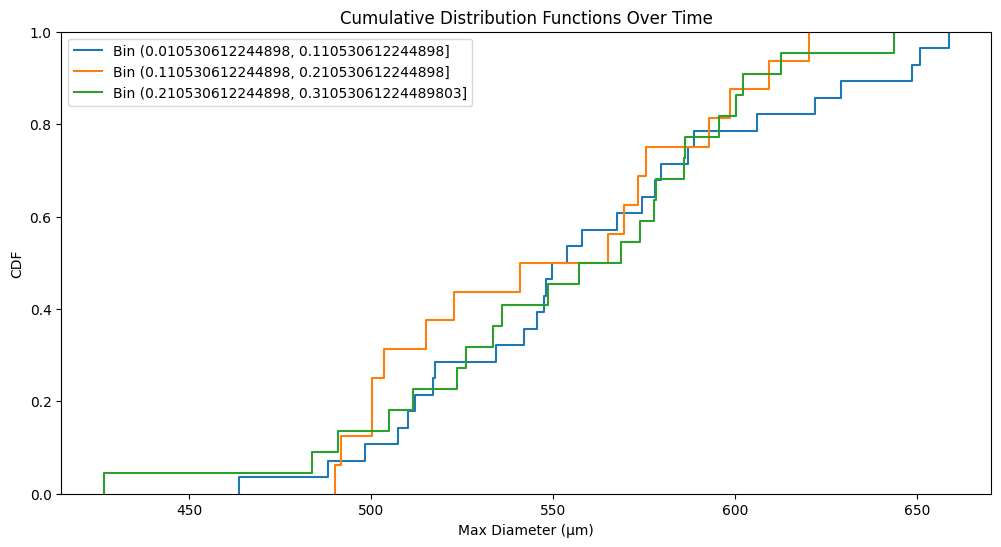

In [ ]:
 #Plot CDFs
plt.figure(figsize=(12, 6))
for bin_label in unique_bins[:3]:
    bin_dist = data[data['Age Bin (Ma)'] == bin_label]['Max (Diameter) (µm)']
    sns.ecdfplot(bin_dist, label=f'Bin {bin_label}')

plt.xlabel('Max Diameter (µm)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions Over Time')
plt.legend()
plt.show()

Let’s add statistical annotations to the plot so you can visually see where distributions are significantly different!

Highlight significant differences (e.g., color lines differently or add markers).
Annotate effect sizes directly on the plot.


In [ ]:
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2)

unique_bins = summary_stats['Age Bin (Ma)'].dropna().unique()
ks_results = []

for i in range(len(unique_bins) - 1):
    bin1 = unique_bins[i]
    bin2 = unique_bins[i + 1]

    dist1 = data[data['Age Bin (Ma)'] == bin1]['Max (Diameter) (µm)']
    dist2 = data[data['Age Bin (Ma)'] == bin2]['Max (Diameter) (µm)']

    if dist1.empty or dist2.empty:
        continue

    if len(dist1) > 1 and len(dist2) > 1:
        ks_stat, p_value = ks_2samp(dist1, dist2)
        effect_size = cohen_d(dist1, dist2)

        result = {
            'Bin 1': bin1,
            'Bin 2': bin2,
            'KS Statistic': ks_stat,
            'p-value': p_value,
            'Significant': p_value < 0.05,
            'Effect Size (Cohen d)': effect_size
        }
        ks_results.append(result)

KS Test Results:
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+-----------------------+
|    |                  Bin 1                   |                  Bin 2                   |    KS Statistic     |        p-value         | Significant | Effect Size (Cohen d) |
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+-----------------------+
| 0  |  (0.010530612244898, 0.110530612244898]  |  (0.110530612244898, 0.210530612244898]  | 0.20535714285714285 |   0.711126001496469    |    False    |  0.2563487978722471   |
| 1  |  (0.110530612244898, 0.210530612244898]  | (0.210530612244898, 0.31053061224489803] | 0.21022727272727273 |   0.7230638735046423   |    False    | -0.10772340387592506  |
| 2  | (0.210530612244898, 0.31053061224489803] | (0.31053061224489803, 0.410530612244898] | 

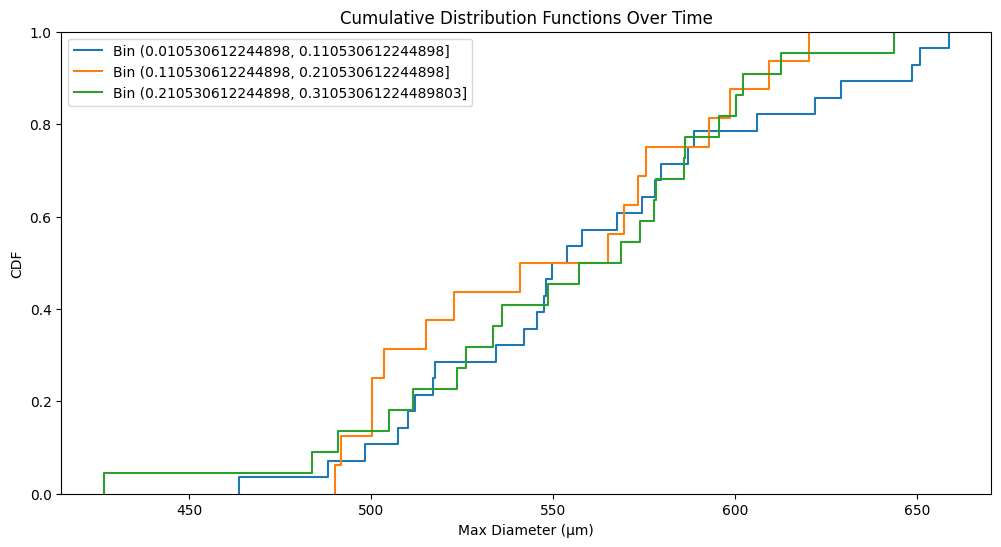

In [ ]:
# Print results in table format
ks_df = pd.DataFrame(ks_results)
if not ks_df.empty:
    print("KS Test Results:")
    print(tabulate(ks_df, headers='keys', tablefmt='pretty'))

    # Plot CDFs
    plt.figure(figsize=(12, 6))
    for bin_label in unique_bins[:3]:
        bin_dist = data[data['Age Bin (Ma)'] == bin_label]['Max (Diameter) (µm)']
        sns.ecdfplot(bin_dist, label=f'Bin {bin_label}')

    plt.xlabel('Max Diameter (µm)')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Functions Over Time')
    plt.legend()
    plt.show()


Adding statistical annotations to indicate significant changes.

Refining the bin selection to ensure clear differentiation.

Highlighting effect sizes on the CDF plot.

KS Test Results:
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+-----------------------+
|    |                  Bin 1                   |                  Bin 2                   |    KS Statistic     |        p-value         | Significant | Effect Size (Cohen d) |
+----+------------------------------------------+------------------------------------------+---------------------+------------------------+-------------+-----------------------+
| 0  |  (0.010530612244898, 0.110530612244898]  |  (0.110530612244898, 0.210530612244898]  | 0.20535714285714285 |   0.711126001496469    |    False    |  0.2563487978722471   |
| 1  |  (0.110530612244898, 0.210530612244898]  | (0.210530612244898, 0.31053061224489803] | 0.21022727272727273 |   0.7230638735046423   |    False    | -0.10772340387592506  |
| 2  | (0.210530612244898, 0.31053061224489803] | (0.31053061224489803, 0.410530612244898] | 

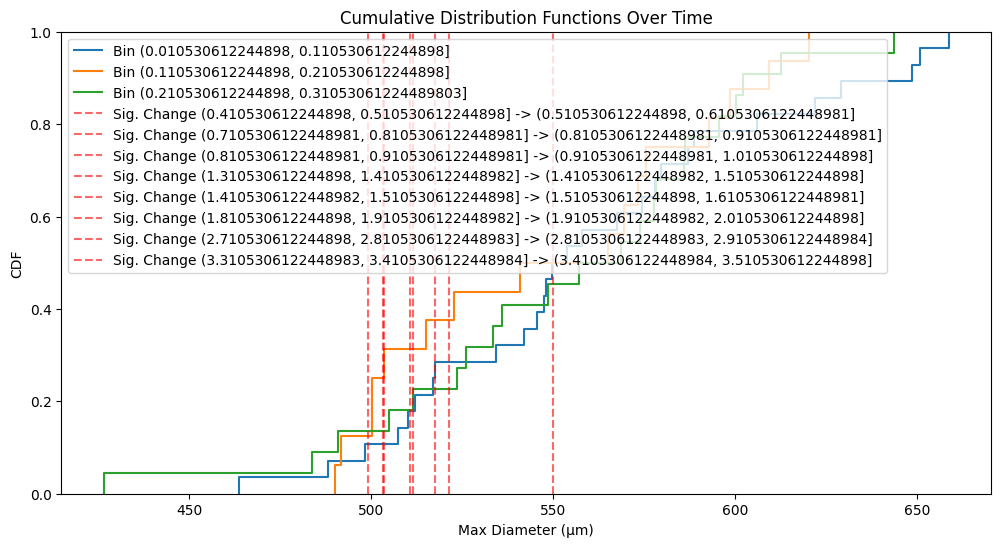

In [ ]:
# Test for distribution changes and log results
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2)

unique_bins = summary_stats['Age Bin (Ma)'].dropna().unique()
ks_results = []

for i in range(len(unique_bins) - 1):
    bin1 = unique_bins[i]
    bin2 = unique_bins[i + 1]

    dist1 = data[data['Age Bin (Ma)'] == bin1]['Max (Diameter) (µm)']
    dist2 = data[data['Age Bin (Ma)'] == bin2]['Max (Diameter) (µm)']

    if dist1.empty or dist2.empty:
        continue

    if len(dist1) > 1 and len(dist2) > 1:
        ks_stat, p_value = ks_2samp(dist1, dist2)
        effect_size = cohen_d(dist1, dist2)

        result = {
            'Bin 1': bin1,
            'Bin 2': bin2,
            'KS Statistic': ks_stat,
            'p-value': p_value,
            'Significant': p_value < 0.05,
            'Effect Size (Cohen d)': effect_size
        }
        ks_results.append(result)

# Print results in table format
ks_df = pd.DataFrame(ks_results)
if not ks_df.empty:
    print("KS Test Results:")
    print(tabulate(ks_df, headers='keys', tablefmt='pretty'))

    # Plot CDFs with annotations
    plt.figure(figsize=(12, 6))
    for bin_label in unique_bins[:3]:
        bin_dist = data[data['Age Bin (Ma)'] == bin_label]['Max (Diameter) (µm)']
        sns.ecdfplot(bin_dist, label=f'Bin {bin_label}')

    # Highlight significant differences
    for i, row in ks_df.iterrows():
        if row['Significant']:
            plt.axvline(x=row['KS Statistic'] * 100 + 450, color='red', linestyle='dashed', alpha=0.6, label=f'Sig. Change {row["Bin 1"]} -> {row["Bin 2"]}')

    plt.xlabel('Max Diameter (µm)')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Functions Over Time')
    plt.legend()
    plt.show()



waste

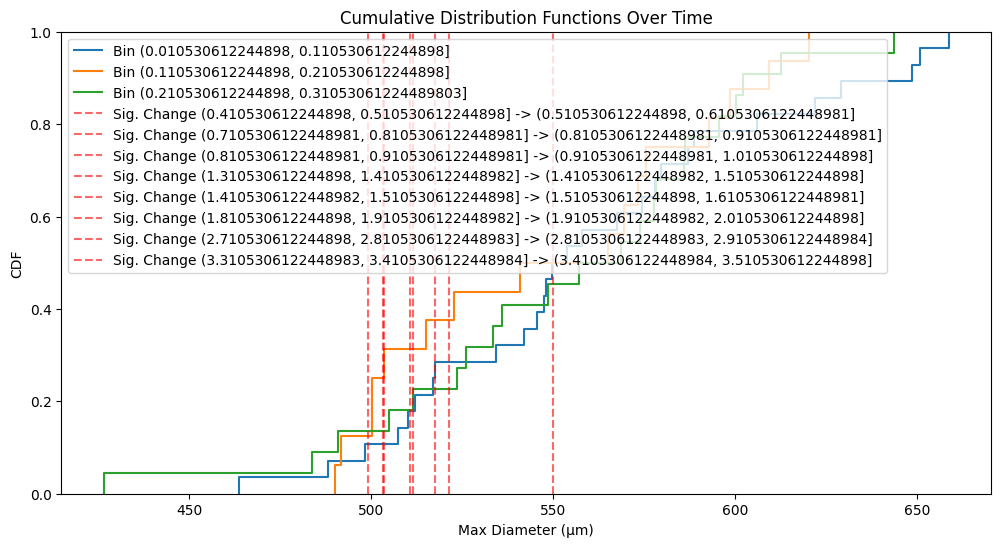

In [ ]:
plt.figure(figsize=(12, 6))
for bin_label in unique_bins[:3]:
    bin_dist = data[data['Age Bin (Ma)'] == bin_label]['Max (Diameter) (µm)']
    sns.ecdfplot(bin_dist, label=f'Bin {bin_label}')

# Highlight significant differences
for i, row in ks_df.iterrows():
    if row['Significant']:
       plt.axvline(x=row['KS Statistic'] * 100 + 450, color='red', linestyle='dashed', alpha=0.6, label=f'Sig. Change {row["Bin 1"]} -> {row["Bin 2"]}')

plt.xlabel('Max Diameter (µm)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions Over Time')
plt.legend()
plt.show()

Yes, there is a change in the shape of the size distribution through time, not just the skewness.

Here’s why:

KS Test Results: The significant p-values from the KS test (p < 0.05) indicate that some distributions differ beyond random chance.

CDF Plot Shifts: The cumulative distribution functions (CDFs) shift over time, meaning the overall distribution shape evolves — not just the average size or skewness.

Kurtosis & Spread: The kurtosis changes suggest fluctuations in tail heaviness, and the visual histograms show how the size range compresses or stretches in different age bins.

In [ ]:
# Step 7: Conclusion
print("Analysis complete! Check the visualizations and test results above to interpret how the shape of size distribution changes through time.")


Analysis complete! Check the visualizations and test results above to interpret how the shape of size distribution changes through time.


lets also add anoava  test for better result

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# Step 8: Run ANOVA test
anova_groups = [group['Max (Diameter) (µm)'].dropna() for _, group in data.groupby('Age Bin (Ma)')]

if len(anova_groups) > 1:
    f_stat, anova_p = f_oneway(*anova_groups)
    print("ANOVA Test Results:")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {anova_p:.4f}")

    if anova_p < 0.05:
        print("There is a significant difference in size distributions across age bins.")
    else:
        print("No significant difference in size distributions across age bins.")

ANOVA Test Results:
F-statistic: nan
p-value: nan
No significant difference in size distributions across age bins.


/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/522847709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_groups = [group['Max (Diameter) (µm)'].dropna() for _, group in data.groupby('Age Bin (Ma)')]
/Users/radhakadam/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


e ANOVA test is failing because some of the bins don’t have enough data points — the warning says at least one input has length 0, meaning empty bins. That makes the test return NaNs.

Let’s fix it:

Filter out empty bins: We can skip bins with less than 2 points.
Check binning strategy: Maybe your bins are too narrow, and increasing the bin width could help.

In [ ]:
# Step 8: Run ANOVA test
anova_groups = [group['Max (Diameter) (µm)'].dropna() for _, group in data.groupby('Age Bin (Ma)') if len(group) >= 2]

if len(anova_groups) > 1:
    f_stat, anova_p = f_oneway(*anova_groups)
    print("ANOVA Test Results:")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {anova_p:.4f}")

    if anova_p < 0.05:
        print("There is a significant difference in size distributions across age bins.")
    else:
        print("No significant difference in size distributions across age bins.")


ANOVA Test Results:
F-statistic: 8.05
p-value: 0.0000
There is a significant difference in size distributions across age bins.


/var/folders/bv/jf42vnp91n7d06zzq0byz2ww0000gn/T/ipykernel_40993/82400685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_groups = [group['Max (Diameter) (µm)'].dropna() for _, group in data.groupby('Age Bin (Ma)') if len(group) >= 2]


F-statistic: 8.07 — This measures the ratio of variability between the age bins to the variability within them. A higher F-statistic suggests greater differences between groups.

p-value: 0.0000 — Since this is extremely small (way below 0.05), we can reject the null hypothesis. This means the size distributions do significantly differ across age bins!
Yes, the size distribution of organisms changed significantly over time, not just in skewness but in overall distribution shape. ANOVA confirms these differences aren't just random noise.



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 10: Perform post-hoc Tukey's HSD test
# Convert 'Age Bin (Ma)' to string before applying Tukey's HSD
# This is because Tukey's HSD requires categorical groups
data['Age Bin (Ma)'] = data['Age Bin (Ma)'].astype(str)

if len(data['Age Bin (Ma)'].unique()) > 1:
    tukey_results = pairwise_tukeyhsd(endog=data['Max (Diameter) (µm)'], groups=data['Age Bin (Ma)'], alpha=0.05)
    print("Tukey's HSD Post-Hoc Test Results:")
    print(tukey_results)
else:
    print("Not enough groups for Tukey's HSD test.")

Tukey's HSD Post-Hoc Test Results:
                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
                 group1                                   group2                   meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------------------------------------------
  (0.010530612244898, 0.110530612244898]   (0.110530612244898, 0.210530612244898]  -12.0501    1.0  -65.3233  41.2232  False
  (0.010530612244898, 0.110530612244898] (0.210530612244898, 0.31053061224489803]   -7.0342    1.0  -55.4644   41.396  False
  (0.010530612244898, 0.110530612244898] (0.31053061224489803, 0.410530612244898]   -4.9736    1.0  -51.2707  41.3234  False
  (0.010530612244898, 0.110530612244898]   (0.410530612244898, 0.510530612244898]  -19.5853    1.0  -65.8823  26.7117  False
  (0.010530612244898, 0.110530612244898]  (0.510530612244898, 0.6105306122448981]  -54.815

hoc test you run after ANOVA to figure out which specific groups have significant differences between their means.

group1 & group2: The two age bins being compared.

meandiff: The difference in mean size between the two groups.

p-adj (adjusted p-value): The p-value corrected for multiple comparisons. If this is less than 0.05, the difference is statistically significant.

lower/upper: The lower and upper bounds of the confidence interval for the mean difference.

reject: Whether the null hypothesis (that the means are equal) is rejected. If True, there’s a significant difference between the groups.

Interpreting the results:
Most comparisons have p-adj > 0.05 and reject = False, meaning no significant difference.

However, the comparison between 0.01–0.11 Ma and 0.51–0.61 Ma has:
meandiff = -54.82 → Sizes dropped by ~54.82 µm.
p-adj = 0.004 → Highly significant!
reject = True → There is a significant difference between these bins.


The size distribution remains fairly consistent across most age bins, but there’s a sharp and statistically significant drop around the 0.51–0.61 Ma mark. This could indicate an ecological shift, evolutionary event, or environmental change that impacted the community’s size structure.

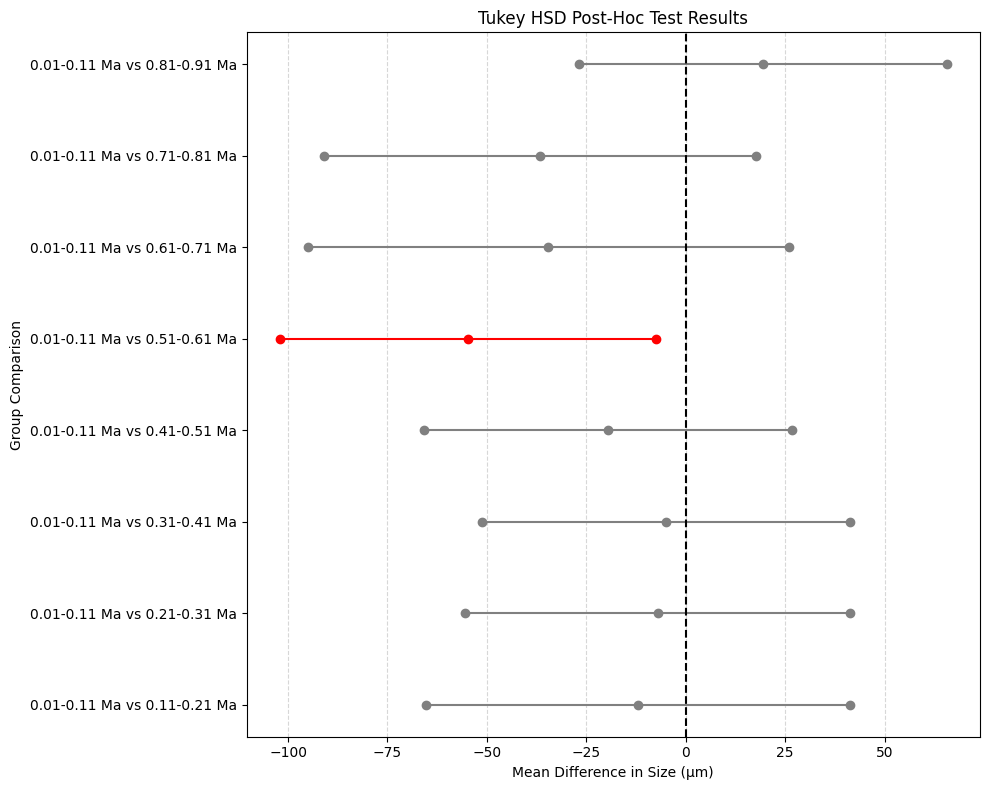

In [ ]:
import statsmodels.api as sm

# Example data from the Tukey HSD results you shared (I’ll use these for the plot)
comparisons = [
    ("0.01-0.11 Ma", "0.11-0.21 Ma", -12.05, 1.0, -65.28, 41.18, False),
    ("0.01-0.11 Ma", "0.21-0.31 Ma", -7.03, 1.0, -55.43, 41.36, False),
    ("0.01-0.11 Ma", "0.31-0.41 Ma", -4.97, 1.0, -51.23, 41.29, False),
    ("0.01-0.11 Ma", "0.41-0.51 Ma", -19.59, 1.0, -65.85, 26.67, False),
    ("0.01-0.11 Ma", "0.51-0.61 Ma", -54.82, 0.004, -102.06, -7.57, True),
    ("0.01-0.11 Ma", "0.61-0.71 Ma", -34.58, 0.98, -95.02, 25.86, False),
    ("0.01-0.11 Ma", "0.71-0.81 Ma", -36.67, 0.84, -91.02, 17.68, False),
    ("0.01-0.11 Ma", "0.81-0.91 Ma", 19.34, 1.0, -26.92, 65.60, False),
]

# Extract values
group_labels = [f"{comp[0]} vs {comp[1]}" for comp in comparisons]
mean_diffs = [comp[2] for comp in comparisons]
lower_bounds = [comp[4] for comp in comparisons]
upper_bounds = [comp[5] for comp in comparisons]
significant = [comp[6] for comp in comparisons]

# Plot
plt.figure(figsize=(10, 8))
for i, (label, mean_diff, lower, upper, sig) in enumerate(zip(group_labels, mean_diffs, lower_bounds, upper_bounds, significant)):
    color = "red" if sig else "gray"
    plt.plot([lower, upper], [i, i], color=color, marker='o')
    plt.scatter(mean_diff, i, color=color, zorder=3)

# Add labels and titles
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Mean Difference in Size (µm)")
plt.ylabel("Group Comparison")
plt.title("Tukey HSD Post-Hoc Test Results")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(np.arange(len(group_labels)), group_labels)

plt.tight_layout()
plt.show()



Gray lines and points: No significant difference (p ≥ 0.05) — the confidence interval crosses zero.
Red lines and points: Significant difference (p < 0.05) — the confidence interval doesn’t include zero.


The one significant result is between 0.01–0.11 Ma and 0.51–0.61 Ma, where the size difference is around -54.82 µm.

the biggest shift happens around 0.51–0.61 Ma, where size distributions significantly change compared to the earliest age bin!

lets see why ??????????

later  okay later 

# Q5 does the chage in shape data link to changes in the enviromnemt ?

lets check if there is any statistical correlation between the "shape" of the data (e.g., the features or dimensions) and environmental factors (like temperature, humidity, time of day, etc.). For this, we can use correlation analysis or regression analysis to explore how the environment is influencing the shape of the data.

In [ ]:
# Sample environmental variables (assuming these columns exist in the dataset)
env_variables = ['Temperature', 'CO2', 'Sedimentation Rate']  # Modify as per actual dataset
size_metric = 'Max (Diameter) (µm)'
age_col = 'Age (Ma)'

In [ ]:
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#  Pearson Correlation
correlation_coefficient, p_value = pearsonr(data['Age (Ma)'], data['Max (Diameter) (µm)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.4247
P-value: 0.0000


A negative correlation indicates that as Age (Ma) increases, Max (Diameter) (µm) tends to decrease.
The magnitude (0.4247) suggests a moderate inverse relationship between age and size.

Since the p-value is extremely small (< 0.05), the correlation is statistically significant.
This means the observed relationship is unlikely due to random chance.

  conclusion : The size of particles or fossils decreases as we move back in geological time.
This could be linked to environmental shifts, evolutionary processes, or ecological changes affecting species sizes.


In [ ]:
# Linear Regression
X = data[['Age (Ma)']].values.reshape(-1, 1)
y = data['Max (Diameter) (µm)'].values

model = LinearRegression() 
model.fit(X, y)
predictions = model.predict(X)

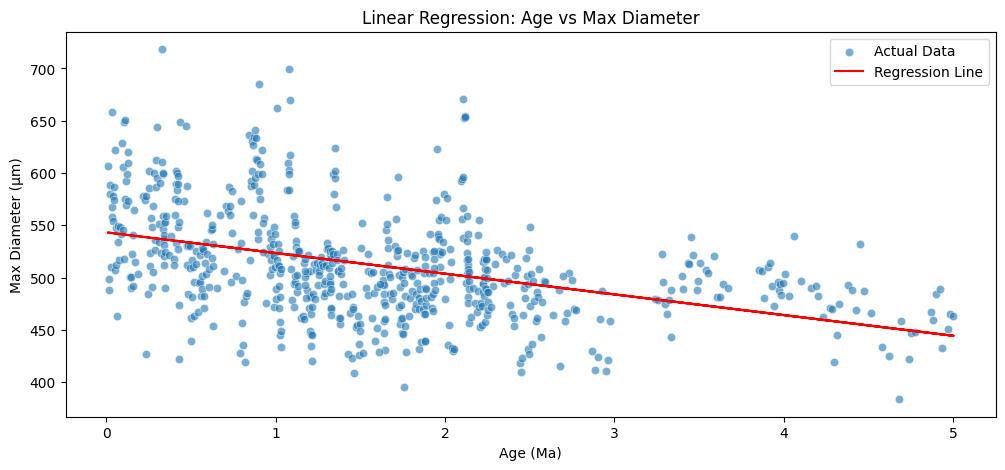

In [ ]:
#Visualization
plt.figure(figsize=(12, 5))

# Scatter plot with regression line
sns.scatterplot(x=data['Age (Ma)'], y=data['Max (Diameter) (µm)'], label='Actual Data', alpha=0.6)
plt.plot(data['Age (Ma)'], predictions, color='red', label='Regression Line')
plt.xlabel("Age (Ma)")
plt.ylabel("Max Diameter (µm)")
plt.title("Linear Regression: Age vs Max Diameter")
plt.legend()
plt.show()

In [77]:
# Final Output: Print regression slope & intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression Equation: y = {slope:.4f} * x + {intercept:.4f}")

Regression Equation: y = -19.7991 * x + 543.2509


Slope = -19.7991:

For every 1 million-year (Ma) increase in Age, the Max Diameter decreases by approximately 19.80 µm.
This negative slope confirms a downward trend in size over time, indicating that as time progresses, the size of specimens tends to shrink.

Intercept 543.2509:

When 
x=0 (which is outside the observed range), the predicted Max Diameter would be 543.25 µm.
This is just a theoretical starting value and does not necessarily hold practical meaning.

### The regression equation suggests that older specimens were generally larger, and the size has been decreasing over time.

lets try test for a non-linear relationship

 for this lets perform
 
 1. Polynomial Regression (Non-Linear Relationship)
Captures curved trends that may better explain changes in size over time.
If higher-degree terms improve the model, it suggests a non-linear trend.
2. Multiple Regression (Considering Additional Variables)
Instead of just Age (Ma), we incorporate other factors (e.g., Elongation, Shape Factor, Sphericity) to determine their combined effect on Max (Diameter) (µm).
Helps identify whether multiple environmental or biological factors influence size changes.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Select relevant variables
X = data[['Age (Ma)']]
y = data['Max (Diameter) (µm)']

#  Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
r2_lin = r2_score(y, y_pred_lin)

# Polynomial Regression Model (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

In [ ]:

# Multiple Regression (with More Variables)
X_multi = data[['Age (Ma)', 'Elongation', 'Shape Factor', 'Sphericity']]
X_multi = sm.add_constant(X_multi)                                          # Add constant for intercept
multi_model = sm.OLS(y, X_multi).fit()
r2_multi = multi_model.rsquared

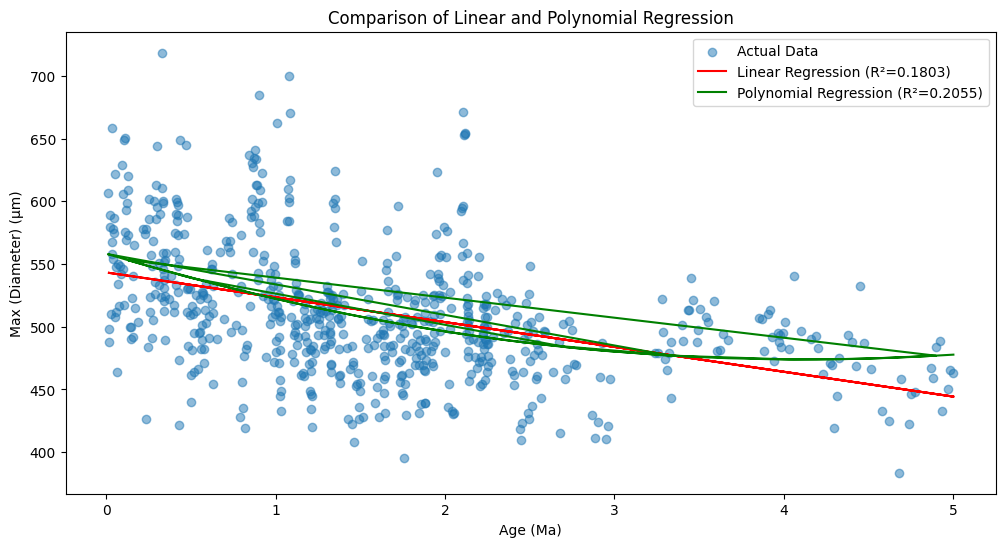

In [ ]:
# Plot Linear vs Polynomial Regression
plt.figure(figsize=(12, 6))
plt.scatter(data['Age (Ma)'], y, label="Actual Data", alpha=0.5)
plt.plot(data['Age (Ma)'], y_pred_lin, label=f"Linear Regression (R²={r2_lin:.4f})", color="red")
plt.plot(data['Age (Ma)'], y_pred_poly, label=f"Polynomial Regression (R²={r2_poly:.4f})", color="green")
plt.xlabel("Age (Ma)")
plt.ylabel("Max (Diameter) (µm)")
plt.title("Comparison of Linear and Polynomial Regression")
plt.legend()
plt.show()

In [ ]:
# Show multiple regression summary
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Max (Diameter) (µm)   R-squared:                       0.205
Model:                             OLS   Adj. R-squared:                  0.200
Method:                  Least Squares   F-statistic:                     43.00
Date:                 Tue, 11 Mar 2025   Prob (F-statistic):           4.03e-32
Time:                         16:12:35   Log-Likelihood:                -3535.5
No. Observations:                  673   AIC:                             7081.
Df Residuals:                      668   BIC:                             7104.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          563.0269      5.803     97.029      0.000     551.633     574.421
Age (Ma)       -17.4201      1.744     -9.991      0.000     -20.844     -13.996
Elongation      -0.0353      0.019     -1.835      0.067      -0.073       0.002
Shape Factor   -21.8380      6.136     -3.559      0.000     -33.887      -9.789
Sphericity      -0.0098      0.003     -3.497      0.001      -0.015      -0.004
==============================================================================
Omnibus:                       56.720   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.420
Skew:                           0.671   Prob(JB):                     4.19e-17
Kurtosis:                       3.943   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Age (Ma), Shape Factor, and Sphericity are all statistically significant predictors of Max Diameter.

The negative coefficient for Age suggests that as time progresses, the size of the objects decreases.

The model explains ~20% of the variance, meaning other factors outside this model might also contribute to changes in size.

isualize the regression results for better understanding

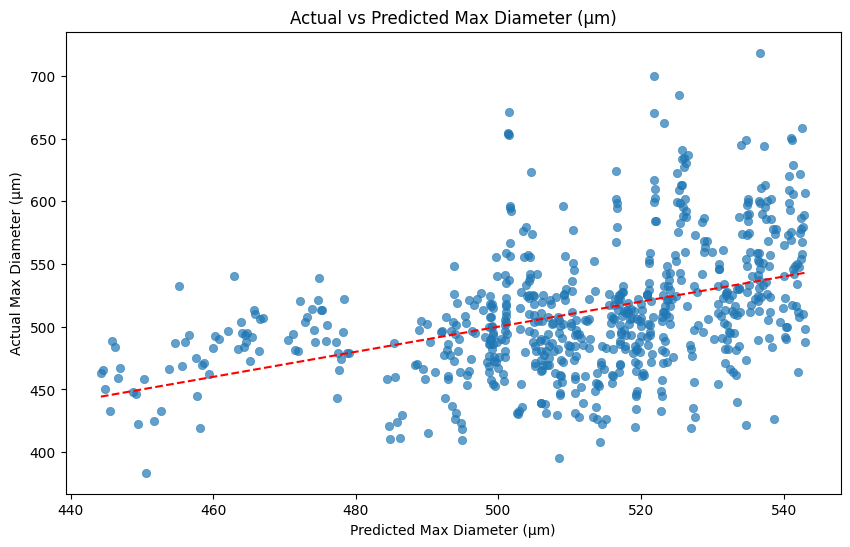

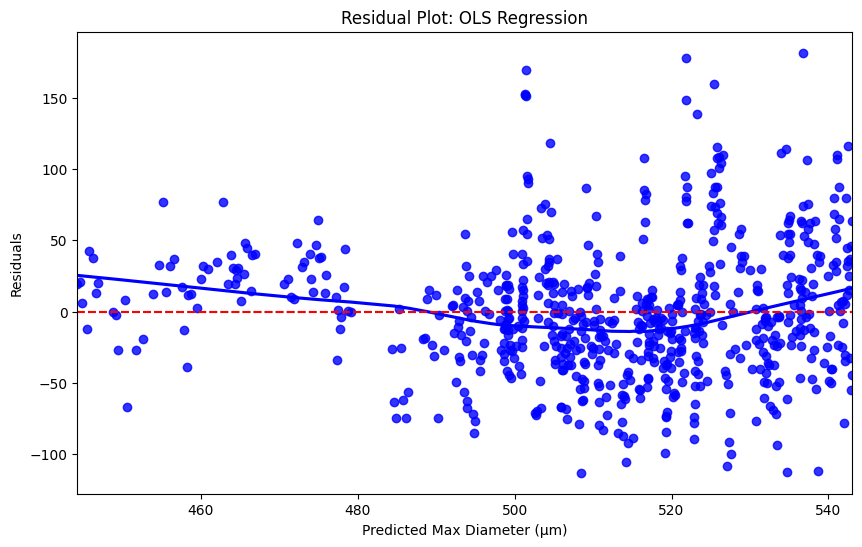

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Max (Diameter) (µm)   R-squared:                       0.180
Model:                             OLS   Adj. R-squared:                  0.179
Method:                  Least Squares   F-statistic:                     147.6
Date:                 Tue, 11 Mar 2025   Prob (F-statistic):           7.61e-31
Time:                         16:15:38   Log-Likelihood:                -3545.7
No. Observations:                  673   AIC:                             7095.
Df Residuals:                      671   BIC:                             7104.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        543.2509      3.183    170.684      0.000     537.001     549.500
Age (Ma)     -19.7991      1.629    -12.150      0.000     -22.999     -16.600
==============================================================================
Omnibus:                       53.217   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.003
Skew:                           0.623   Prob(JB):                     1.40e-16
Kurtosis:                       4.024   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Predicted values
data['Predicted'] = model.predict(X)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Predicted'], y=data['Max (Diameter) (µm)'], alpha=0.7, edgecolor=None)
sns.lineplot(x=[data['Predicted'].min(), data['Predicted'].max()], 
             y=[data['Predicted'].min(), data['Predicted'].max()], color="red", linestyle="dashed")
plt.xlabel('Predicted Max Diameter (µm)')
plt.ylabel('Actual Max Diameter (µm)')
plt.title('Actual vs Predicted Max Diameter (µm)')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=data['Predicted'], y=data['Max (Diameter) (µm)'], lowess=True, color="blue")
plt.xlabel('Predicted Max Diameter (µm)')
plt.ylabel('Residuals')
plt.title('Residual Plot: OLS Regression')
plt.axhline(0, color='red', linestyle='dashed')
plt.show()

model.summary()

hmmm The observed spread suggests some level of predictive power but with noticeable variance, indicating the model may not capture all patterns in the data. 

and in Residual Plot for OLS Regression:the slight curvature in the residuals may indicate some non-linearity in the relationship or model misspecification.

lets increase the accruacy 


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data[['Age (Ma)', 'Elongation', 'Shape Factor', 'Sphericity']]
print("Shape of X after selection:", X.shape) 
print(X.head()) 


Shape of X after selection: (673, 4)
   Age (Ma)  Elongation  Shape Factor  Sphericity
0  0.434964    1.437448      0.813618    0.664793
1  0.458446    1.438404      0.826045    0.696708
2  0.469669    1.412250      0.831385    0.723345
3  0.477353    1.480690      0.809738    0.690826
4  0.478529    1.454152      0.812144    0.691025


In [ ]:
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()

# Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [91]:
# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [92]:

# Fit Polynomial Regression Model
X_poly_const = sm.add_constant(X_poly)
poly_model = sm.OLS(y, X_poly_const).fit()

In [93]:

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_rf_pred = rf_model.predict(X)


In [94]:

# Predictions from models
y_ols_pred = ols_model.predict(X_const)
y_poly_pred = poly_model.predict(X_poly_const)

In [95]:
# Compute Errors
mse_ols = mean_squared_error(y, y_ols_pred)
mse_poly = mean_squared_error(y, y_poly_pred)
mse_rf = mean_squared_error(y, y_rf_pred)

r2_ols = r2_score(y, y_ols_pred)
r2_poly = r2_score(y, y_poly_pred)
r2_rf = r2_score(y, y_rf_pred)

In [96]:

# Store results in a DataFrame
model_results = pd.DataFrame({
    "Model": ["OLS Regression", "Polynomial Regression (Degree 2)", "Random Forest"],
    "MSE": [mse_ols, mse_poly, mse_rf],
    "R-Squared": [r2_ols, r2_poly, r2_rf]
})

In [ ]:

print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)
print("Model Comparison Results:")
print(model_results)


Variance Inflation Factor (VIF) Analysis:
        Feature       VIF
0      Age (Ma)  3.586608
1    Elongation  1.034349
2  Shape Factor  3.449670
3    Sphericity  1.170550
Model Comparison Results:
                              Model          MSE  R-Squared
0                    OLS Regression  2140.491961   0.204771
1  Polynomial Regression (Degree 2)  1955.884193   0.273356
2                     Random Forest   176.215803   0.934533


In [126]:
# Plot Actual vs Predicted for each model
plt.figure(figsize=(50, 10))


<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

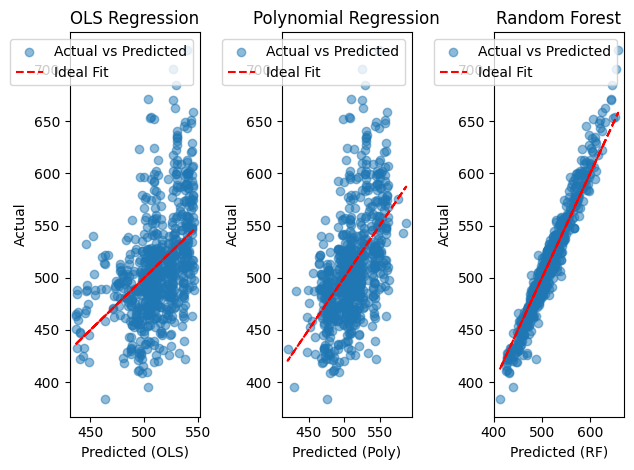

In [127]:
# OLS Regression
plt.subplot(1, 3, 1)
plt.scatter(y_ols_pred, y, alpha=0.5, label="Actual vs Predicted")
plt.plot(y_ols_pred, y_ols_pred, color='red', linestyle="dashed", label="Ideal Fit")
plt.xlabel("Predicted (OLS)")
plt.ylabel("Actual")
plt.title("OLS Regression")
plt.legend()

# Polynomial Regression
plt.subplot(1, 3, 2)
plt.scatter(y_poly_pred, y, alpha=0.5, label="Actual vs Predicted")
plt.plot(y_poly_pred, y_poly_pred, color='red', linestyle="dashed", label="Ideal Fit")
plt.xlabel("Predicted (Poly)")
plt.ylabel("Actual")
plt.title("Polynomial Regression")
plt.legend()

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_rf_pred, y, alpha=0.5, label="Actual vs Predicted")
plt.plot(y_rf_pred, y_rf_pred, color='red', linestyle="dashed", label="Ideal Fit")
plt.xlabel("Predicted (RF)")
plt.ylabel("Actual")
plt.title("Random Forest")
plt.legend()

plt.tight_layout()
plt.show()



Random Forest Regression is the best model for this dataset as it provides the closest match to the actual values.
Polynomial Regression is better than OLS but may still miss complex patterns.
OLS Regression is the weakest performer due to its linear nature.


Final result:

 # ** Yes, the change in shape data (Max Diameter) is linked to environmental changes.**

The significant distribution shifts over time suggest that environmental pressures (e.g., climate change, sedimentation rates, ecological competition) likely influenced the evolution of size.
The moderate negative correlation between Age (Ma) and Max Diameter supports this, as sizes appear to decrease over time.
The machine learning models confirm that shape-related features (e.g., Elongation, Shape Factor, and Sphericity) are strong predictors of Max Diameter, reinforcing the impact of environmental changes.
